# Import Python Packages and Environment Setup

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from datetime import date
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [6]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [7]:
%matplotlib inline

# Importing and Analyzing the Train and Test CSVs

In [9]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
df_test = pd.read_csv('test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


<h2> Data Preprocessing<h2>

In [13]:
# We need to take care of the missing values in the dataset

In [14]:
lot_frontage_mean = df['LotFrontage'].mean()
df['LotFrontage'].fillna(lot_frontage_mean, inplace = True)
print('Replaced the missing values for the LotFrontage Column with the Mean: ' + str(lot_frontage_mean))

Replaced the missing values for the LotFrontage Column with the Mean: 70.04995836802665


In [15]:
# Changes made in the train file must also be made to the test file

In [16]:
test_lot_frontage_mean = df_test['LotFrontage'].mean()
df_test['LotFrontage'].fillna(test_lot_frontage_mean, inplace = True)
print('Replaced the missing values for the LotFrontage Column in the Test Set with the Mean: ' + str(test_lot_frontage_mean))

Replaced the missing values for the LotFrontage Column in the Test Set with the Mean: 68.58035714285714


In [17]:
print(df['Alley'].unique())
print(df_test['Alley'].unique())

df['Alley'].fillna('None', inplace = True)
df_test['Alley'].fillna('None', inplace = True)

[nan 'Grvl' 'Pave']
[nan 'Pave' 'Grvl']


In [18]:
df['MasVnrArea'].fillna(0, inplace = True)
df_test['MasVnrArea'].fillna(0, inplace = True)
print('Replaced the missing values for the MasVnrArea Column with 0')

Replaced the missing values for the MasVnrArea Column with 0


In [19]:
df['MasVnrType'].fillna('None', inplace = True)
df_test['MasVnrType'].fillna('None', inplace = True)

print('Replaced the missing values for the MasVnrArea Column with None')
print(df['MasVnrType'].unique())
print(df_test['MasVnrType'].unique())

Replaced the missing values for the MasVnrArea Column with None
['BrkFace' 'None' 'Stone' 'BrkCmn']
['None' 'BrkFace' 'Stone' 'BrkCmn']


In [20]:
print(df['FireplaceQu'].unique())
print(df_test['FireplaceQu'].unique())

df['FireplaceQu'].fillna('None', inplace = True)
df_test['FireplaceQu'].fillna('None', inplace = True)

[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
[nan 'TA' 'Gd' 'Po' 'Fa' 'Ex']


In [21]:
print(df['GarageType'].unique())
print(df['GarageFinish'].unique())
print(df['GarageQual'].unique())
print(df['GarageCond'].unique())

df['GarageType'].fillna('None', inplace = True)
df['GarageFinish'].fillna('None', inplace = True)
df['GarageQual'].fillna('None', inplace = True)
df['GarageCond'].fillna('None', inplace = True)

['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
['RFn' 'Unf' 'Fin' nan]
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


In [22]:
print(df_test['GarageType'].unique())
print(df_test['GarageFinish'].unique())
print(df_test['GarageQual'].unique())
print(df_test['GarageCond'].unique())

df_test['GarageType'].fillna('None', inplace = True)
df_test['GarageFinish'].fillna('None', inplace = True)
df_test['GarageQual'].fillna('None', inplace = True)
df_test['GarageCond'].fillna('None', inplace = True)

['Attchd' 'Detchd' 'BuiltIn' nan 'Basment' '2Types' 'CarPort']
['Unf' 'Fin' 'RFn' nan]
['TA' nan 'Fa' 'Gd' 'Po']
['TA' nan 'Fa' 'Gd' 'Po' 'Ex']


In [23]:
print(df['BsmtQual'].unique())
print(df['BsmtCond'].unique())
print(df['BsmtExposure'].unique())
print(df['BsmtFinType1'].unique())
print(df['BsmtFinType2'].unique())

df['BsmtQual'].fillna('None', inplace = True)
df['BsmtCond'].fillna('None', inplace = True)
df['BsmtExposure'].fillna('None', inplace = True)
df['BsmtFinType1'].fillna('None', inplace = True)
df['BsmtFinType2'].fillna('None', inplace = True)

['Gd' 'TA' 'Ex' nan 'Fa']
['TA' 'Gd' nan 'Fa' 'Po']
['No' 'Gd' 'Mn' 'Av' nan]
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']


In [24]:
print(df_test['BsmtQual'].unique())
print(df_test['BsmtCond'].unique())
print(df_test['BsmtExposure'].unique())
print(df_test['BsmtFinType1'].unique())
print(df_test['BsmtFinType2'].unique())

df_test['BsmtQual'].fillna('None', inplace = True)
df_test['BsmtCond'].fillna('None', inplace = True)
df_test['BsmtExposure'].fillna('None', inplace = True)
df_test['BsmtFinType1'].fillna('None', inplace = True)
df_test['BsmtFinType2'].fillna('None', inplace = True)

['TA' 'Gd' 'Ex' 'Fa' nan]
['TA' 'Po' 'Fa' 'Gd' nan]
['No' 'Gd' 'Mn' 'Av' nan]
['Rec' 'ALQ' 'GLQ' 'Unf' 'BLQ' 'LwQ' nan]
['LwQ' 'Unf' 'Rec' 'BLQ' 'GLQ' 'ALQ' nan]


In [25]:
df['BsmtFinSF1'].fillna(0, inplace = True)
df['BsmtFinSF2'].fillna(0, inplace = True)
df['BsmtUnfSF'].fillna(0, inplace = True)
df['TotalBsmtSF'].fillna(0, inplace = True)
df['BsmtFullBath'].fillna(0, inplace = True)
df['BsmtHalfBath'].fillna(0, inplace = True)

In [26]:
df_test['BsmtFinSF1'].fillna(0, inplace = True)
df_test['BsmtFinSF2'].fillna(0, inplace = True)
df_test['BsmtUnfSF'].fillna(0, inplace = True)
df_test['TotalBsmtSF'].fillna(0, inplace = True)
df_test['BsmtFullBath'].fillna(0, inplace = True)
df_test['BsmtHalfBath'].fillna(0, inplace = True)

In [27]:
print(df['GarageYrBlt'].unique())
GarageYrBlt = df['GarageYrBlt'].dropna().median()
print('Replacing Missing Values for the Garage Year Built Column with it\'s Median ' + str(GarageYrBlt))

df['GarageYrBlt'].fillna(GarageYrBlt, inplace = True)

[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924.
 1996. 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927.
 1947. 1937. 1942. 1938. 1952. 1928. 1922. 1934. 1906. 1914. 1946. 1908.
 1929. 1933.]
Replacing Missing Values for the Garage Year Built Column with it's Median 1980.0


In [28]:
print(df_test['GarageYrBlt'].unique())
GarageYrBlt = df_test['GarageYrBlt'].dropna().median()
print('Replacing Missing Values for the Garage Year Built Column with it\'s Median ' + str(GarageYrBlt))

df_test['GarageYrBlt'].fillna(GarageYrBlt, inplace = True)

[1961. 1958. 1997. 1998. 1992. 1993. 1990. 1970. 1999. 1971. 1975. 2009.
 2005. 2003. 2002. 2006. 2004. 1920. 1974. 2000. 2010. 1967. 1978. 1966.
 1964.   nan 1994. 1949. 1959. 1956. 1952. 1955. 1989. 1950. 1960. 1963.
 1900. 1957. 1938. 1948. 1962. 1928. 1930. 1926. 1939. 1973. 1942. 1979.
 1923. 1915. 1917. 1940. 1910. 1969. 1968. 1977. 1945. 1987. 1947. 1954.
 1941. 1951. 1896. 1976. 2008. 2007. 1965. 2001. 1972. 1984. 1985. 1996.
 1995. 1980. 1986. 1981. 1982. 1991. 1988. 1953. 1924. 1927. 1946. 1934.
 1983. 1916. 1918. 1937. 1932. 1935. 1925. 1921. 1895. 1922. 2207. 1936.
 1943. 1919.]
Replacing Missing Values for the Garage Year Built Column with it's Median 1979.0


In [29]:
print(df['GarageArea'].unique())
print(df['GarageQual'].unique())

df['GarageArea'].fillna(0, inplace = True)
df['GarageQual'].fillna(0, inplace = True)

[ 548  460  608  642  836  480  636  484  468  205  384  736  352  840
  576  516  294  853  280  534  572  270  890  772  319  240  250  271
  447  556  691  672  498  246    0  440  308  504  300  670  826  386
  388  528  894  565  641  288  645  852  558  220  667  360  427  490
  379  297  283  509  405  758  461  400  462  420  432  506  684  472
  366  476  410  740  648  273  546  325  792  450  180  430  594  390
  540  264  530  435  453  750  487  624  471  318  766  660  470  720
  577  380  434  866  495  564  312  625  680  678  726  532  216  303
  789  511  616  521  451 1166  252  497  682  666  786  795  856  473
  398  500  349  454  644  299  210  431  438  675  968  721  336  810
  494  457  818  463  604  389  538  520  309  429  673  884  868  492
  413  924 1053  439  671  338  573  732  505  575  626  898  529  685
  281  539  418  588  282  375  683  843  552  870  888  746  708  513
 1025  656  872  292  441  189  880  676  301  474  706  617  445  200
  592 

In [30]:
print(df_test['GarageArea'].unique())
print(df_test['GarageQual'].unique())

df_test['GarageArea'].fillna(0, inplace = True)
df_test['GarageQual'].fillna(0, inplace = True)

[ 730.  312.  482.  470.  506.  440.  420.  393.  525.  511.  264.  320.
  308.  751.  868.  678.  958.  756.  484.  430.  437.  400.  433.  962.
  880.  676.  528.  429.  461.  762.  713.  588.  480.  496.  852.  592.
  596.  535.  660.  441.  490.  504.  517.    0.  315.  576.  620.  263.
  318.  305.  280.  240.  551.  780.  288.  624.  363.  200.  572.  180.
  365.  231.  450.  416.  591.  690.  522.  467.  209.  366. 1017.  615.
  580.  513.  850.  621.  319.  336.  352.  260.  399.  473.  598.  531.
  625.  330.  741.  776.  520.  686.  253.  286.  495.  616.  275.  502.
  632.  390.  564.  396.  409.  567.  529.  479.  581.  565.  478.  477.
  345.  656.  754.  864.  896.  834.  932.  640.  927.  700.  583.  886.
  871.  949.  685.  649.  539.  701.  392.  397.  436.  434.  644.  394.
  658.  410.  810.  815.  647.  623.  972.  726.  844.  492.  795.  984.
  692.  782.  711.  628.  845.  788.  559.  542.  465.  612.  732.  300.
  252.  524.  704.  561.  641.  642.  540.  527.  7

In [31]:
print(df['MiscFeature']. unique())
print(df_test['MiscFeature']. unique())

df['MiscFeature'].fillna('None', inplace = True)
df_test['MiscFeature'].fillna('None', inplace = True)

[nan 'Shed' 'Gar2' 'Othr' 'TenC']
[nan 'Gar2' 'Shed' 'Othr']


In [32]:
# Dropping the utilities column since we cannot replace the missing values

df.drop('Utilities', axis = 1, inplace = True)
df_test.drop('Utilities', axis = 1, inplace = True)

In [33]:
print(df['Fence'].unique())
print(df_test['Fence'].unique())

df['Fence'].fillna('None', inplace = True)
df_test['Fence'].fillna('None', inplace = True)

[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
['MnPrv' nan 'GdPrv' 'GdWo' 'MnWw']


In [34]:
print(df['PoolQC'].unique())
print(df_test['PoolQC'].unique())

df['PoolQC'].fillna('None', inplace = True)
df_test['PoolQC'].fillna('None', inplace = True)

[nan 'Ex' 'Fa' 'Gd']
[nan 'Ex' 'Gd']


In [35]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuilt    

In [36]:
print(df_test['MSZoning'].unique())
MSZoning = df.MSZoning.mode()
df_test['MSZoning'].fillna(MSZoning[0], inplace = True)

['RH' 'RL' 'RM' 'FV' 'C (all)' nan]


In [37]:
print(df_test['Exterior1st'].unique())
Exterior1st = df.Exterior1st.mode()
df_test['Exterior1st'].fillna(Exterior1st[0], inplace = True)

['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'CemntBd' 'WdShing'
 'BrkFace' 'AsbShng' 'BrkComm' 'Stucco' 'AsphShn' nan 'CBlock']


In [38]:
print(df_test['Exterior2nd'].unique())
Exterior2nd = df.Exterior2nd.mode()
df_test['Exterior2nd'].fillna(Exterior2nd[0], inplace = True)

['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'Brk Cmn' 'CmentBd'
 'ImStucc' 'Wd Shng' 'AsbShng' 'Stucco' 'CBlock' 'BrkFace' 'AsphShn' nan
 'Stone']


In [39]:
print(df_test['KitchenQual'].unique())
KitchenQual = df.KitchenQual.mode()
df_test['KitchenQual'].fillna(KitchenQual[0], inplace = True)

['TA' 'Gd' 'Ex' 'Fa' nan]


In [40]:
print(df_test['Functional'].unique())
Functional = df.Functional.mode()
df_test['Functional'].fillna(Functional[0], inplace = True)

['Typ' 'Min2' 'Min1' 'Mod' 'Maj1' 'Sev' 'Maj2' nan]


In [41]:
print(df_test['SaleType'].unique())
SaleType = df.SaleType.mode()
df_test['SaleType'].fillna(SaleType[0], inplace = True)

['WD' 'COD' 'New' 'ConLD' 'Oth' 'Con' 'ConLw' 'ConLI' 'CWD' nan]


In [42]:
print(df_test['GarageCars'].unique())
df_test['GarageCars'].fillna('None', inplace = True)
df_test[df_test['GarageCars'] == 'None'].GarageArea

[ 1.  2.  3.  0.  4.  5. nan]


C:\Users\emuan\AppData\Local\Temp\ipykernel_21940\3412459792.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_test['GarageCars'].fillna('None', inplace = True)


1116    0.0
Name: GarageArea, dtype: float64

In [43]:
df_test['GarageCars'].replace(to_replace = ['None'], value = np.nan, inplace = True)
df_test['GarageCars'].fillna(0, inplace = True)
print(df_test['GarageCars'].unique())

[1. 2. 3. 0. 4. 5.]


In [44]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

# Data Visualization

C:\Users\emuan\AppData\Local\Temp\ipykernel_21940\1083995412.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a = df['SalePrice'], bins = 50, color = 'gray', vertical = False).set_title('Sale Price')
C:\Users\emuan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Sale Price')

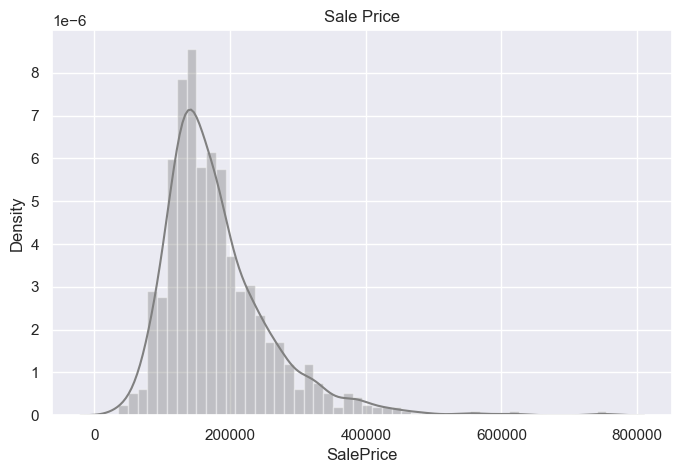

In [46]:
sns.set(style = "darkgrid")
sns.set(rc = {'figure.figsize':(8,5)})

sns.distplot(a = df['SalePrice'], bins = 50, color = 'gray', vertical = False).set_title('Sale Price')

<h3> Visualizing the correlation with a heat map </h3>

In [48]:
corr = df.corr(numeric_only=True)

<Axes: >

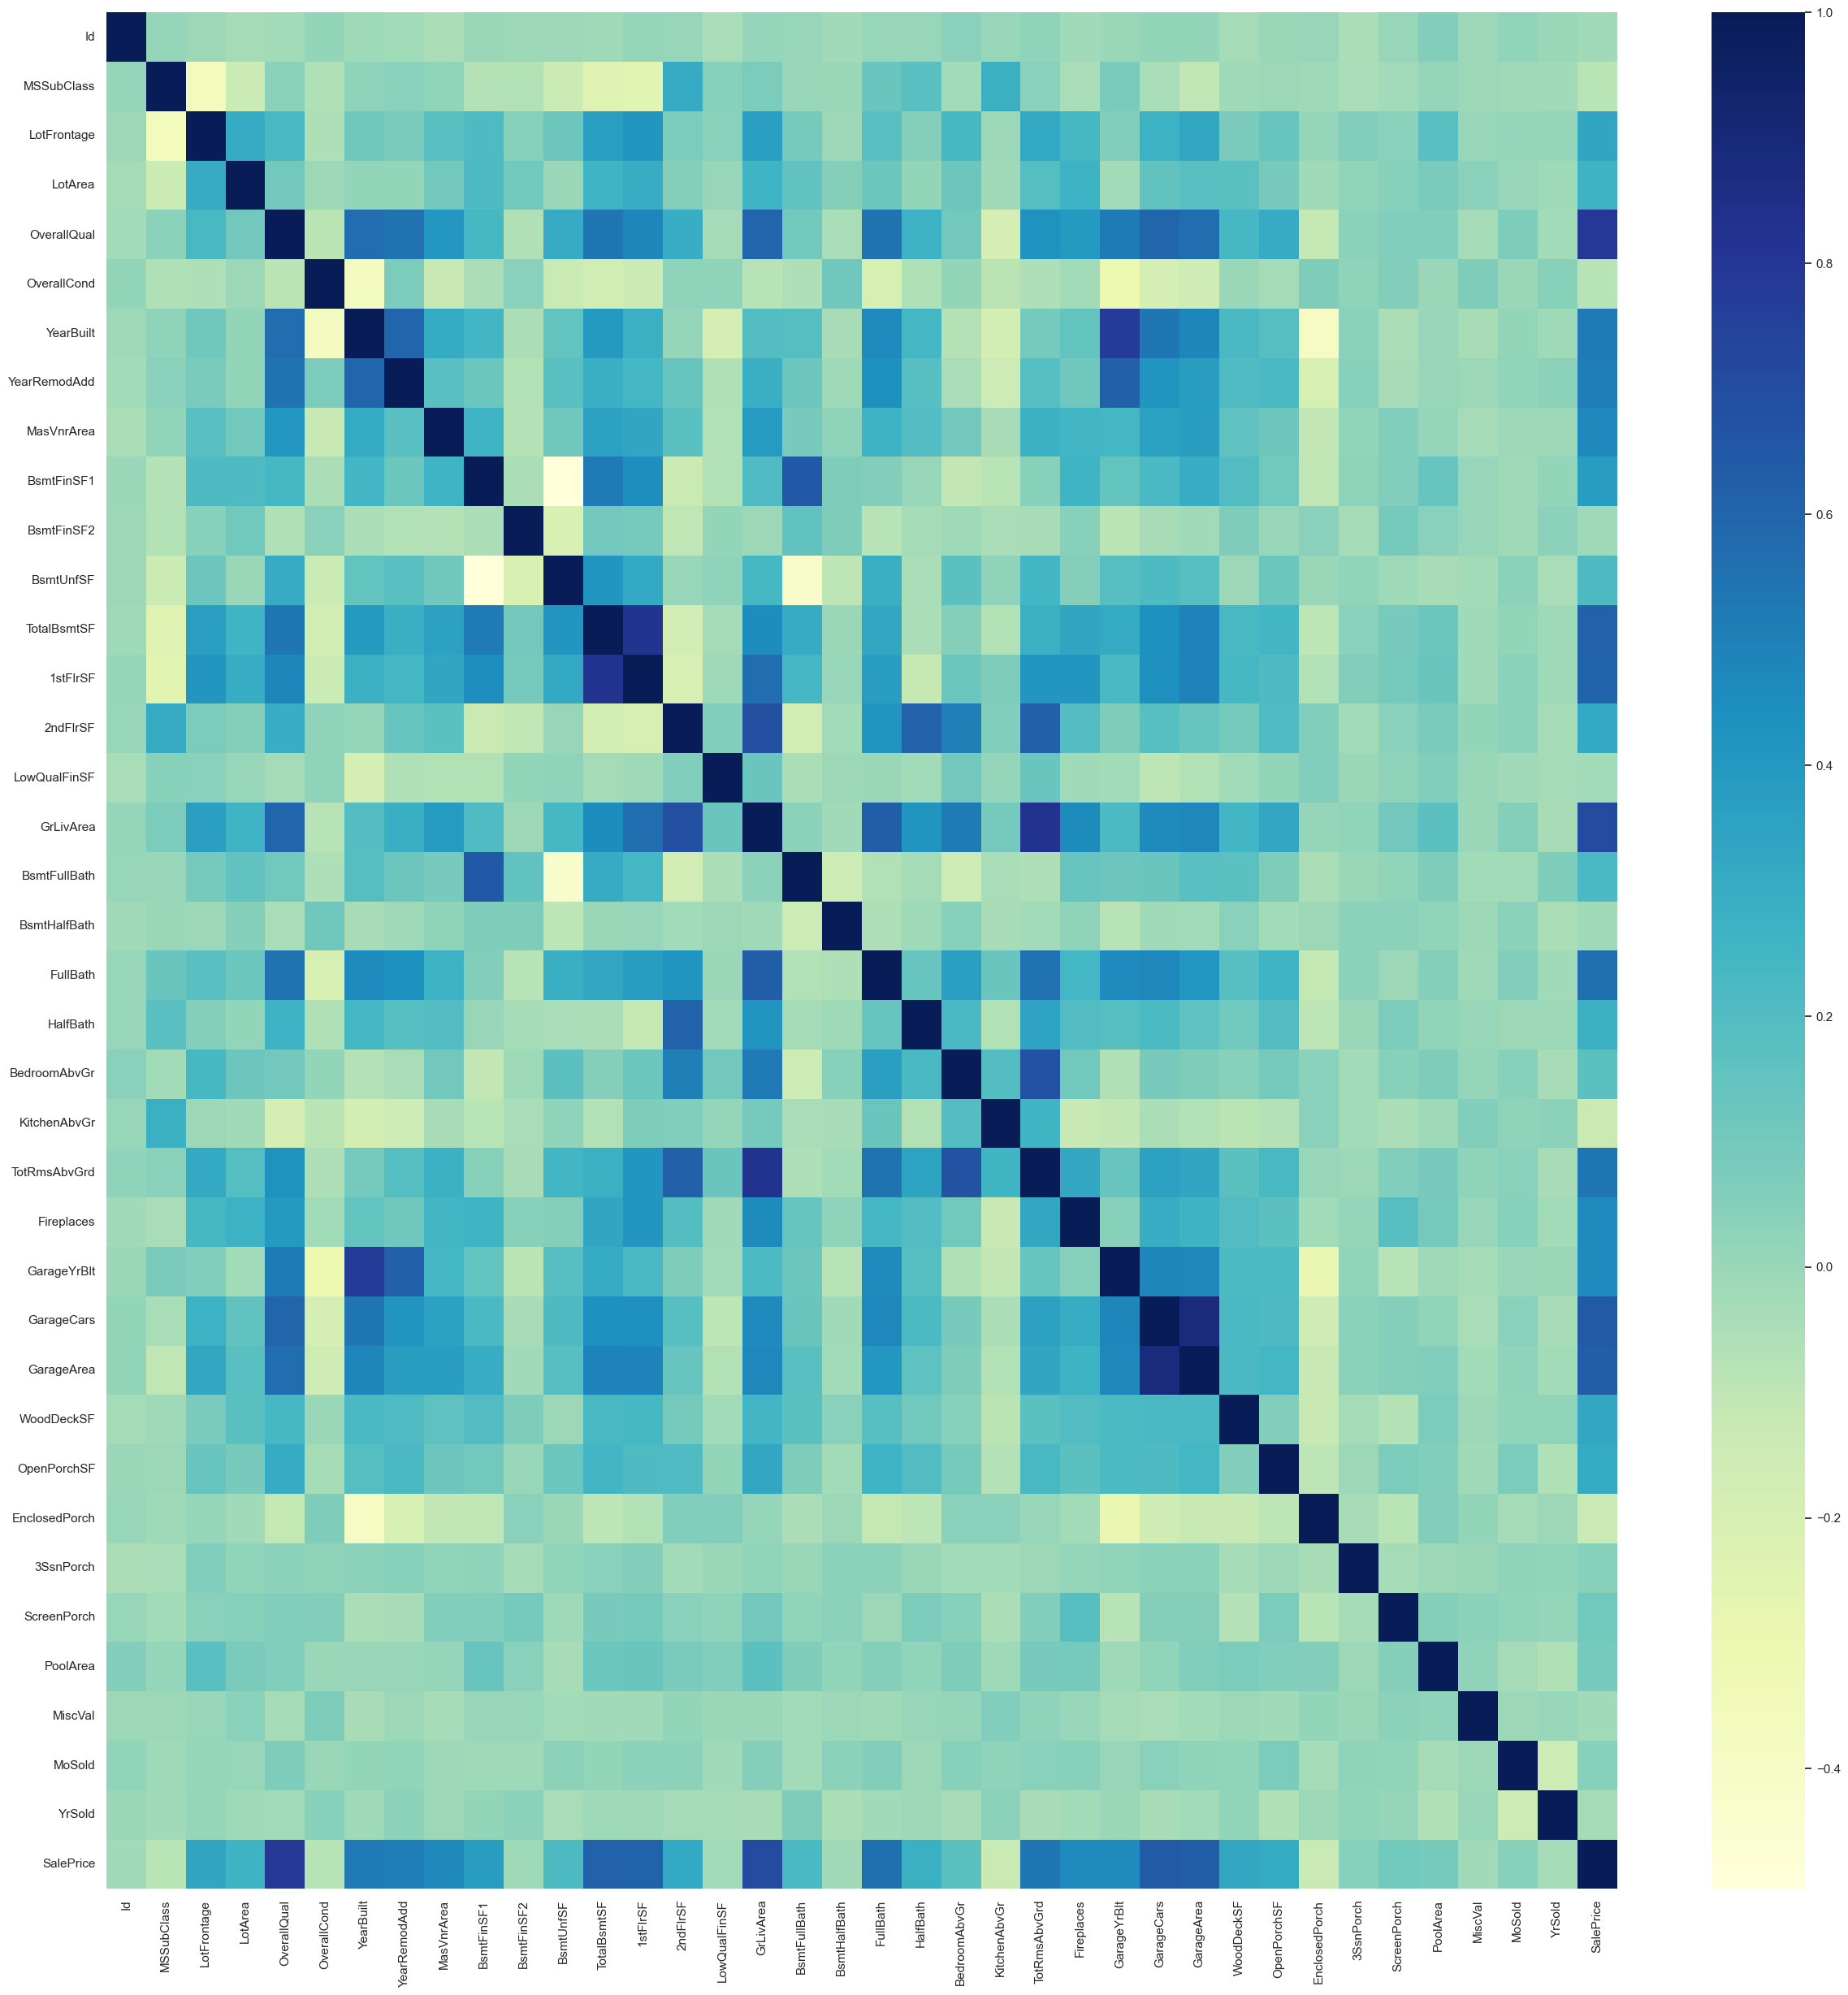

In [49]:
sns.set(style = "darkgrid")
sns.set(rc = {'figure.figsize':(30, 30)})

sns.heatmap(corr, cmap = "YlGnBu")

<Axes: >

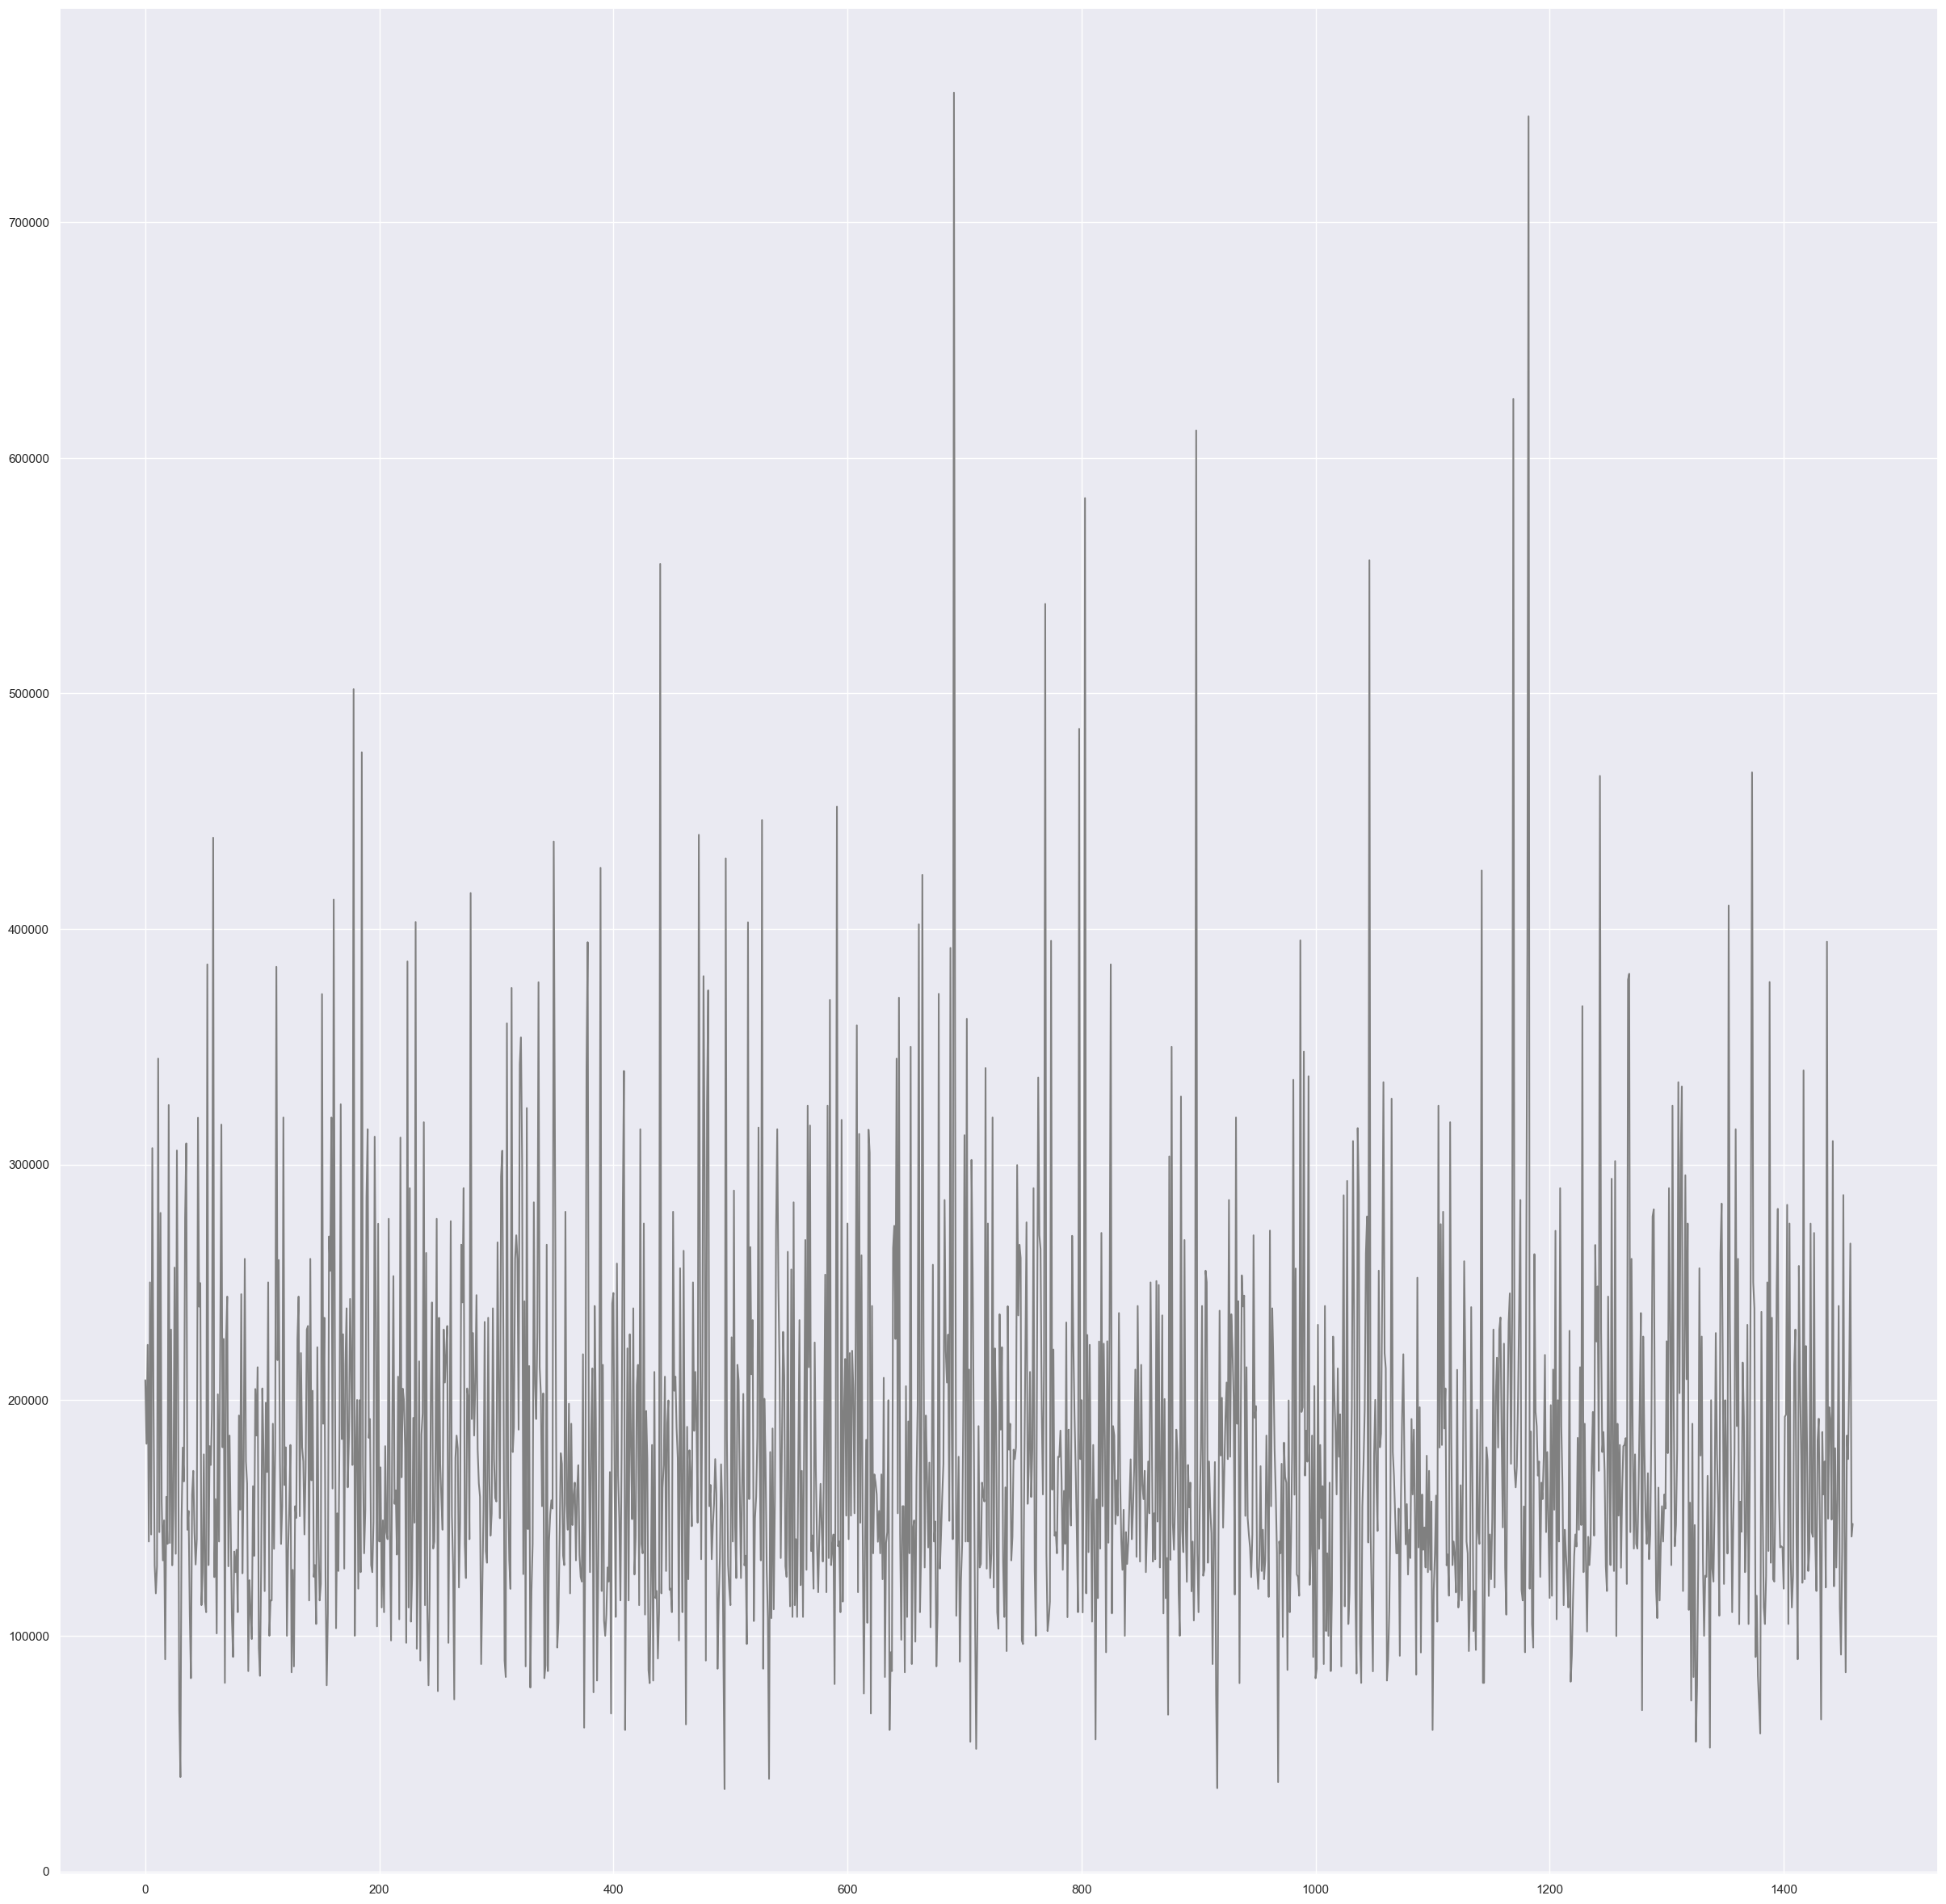

In [50]:
df['SalePrice'].plot(color = "gray")

<Axes: xlabel='SalePrice', ylabel='LotArea'>

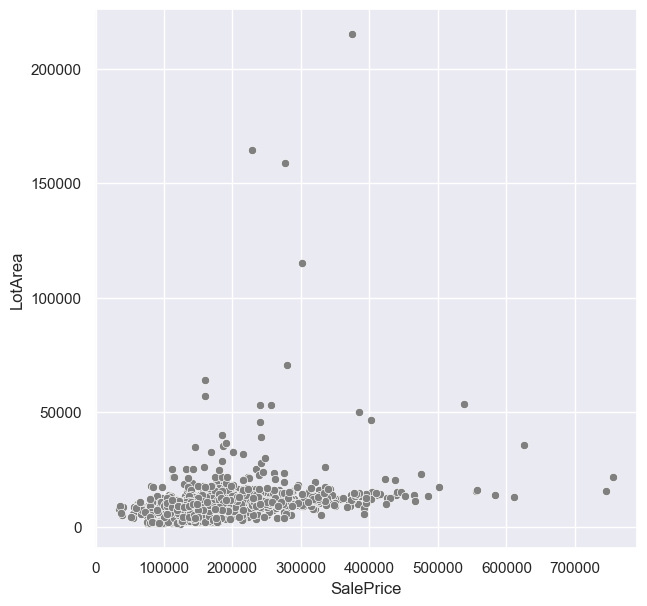

In [51]:
sns.set(style = 'darkgrid')
sns.set(rc = {'figure.figsize':(7,7)})
sns.scatterplot(x = 'SalePrice', y = 'LotArea', data = df, color = 'gray')

[Text(0.5, 0, 'Residential Low Density, Residential Medium Density, Commercial, Floating Village Residential, Residential High Density')]

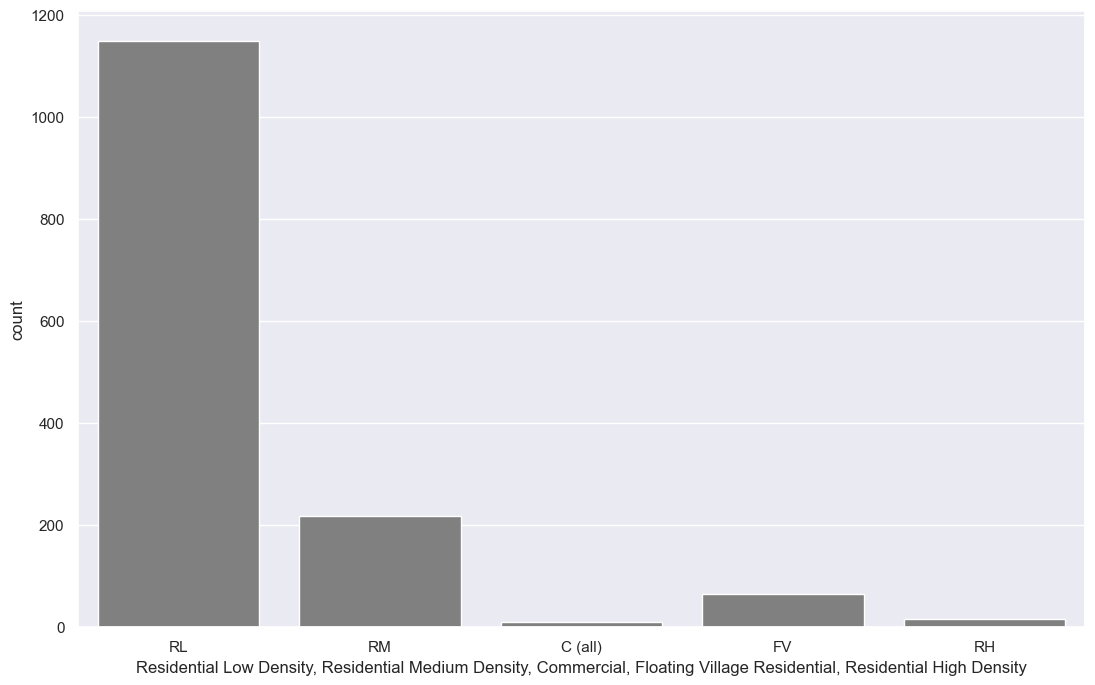

In [52]:
sns.set(rc={'figure.figsize':(13, 8)})
# ax = sns.countplot(df['MSZoning'], color = 'gray')
ax = sns.countplot(x='MSZoning',data = df,color = 'gray')
ax.set(xlabel = "Residential Low Density, Residential Medium Density, Commercial, Floating Village Residential, Residential High Density")

<Axes: xlabel='SalePrice', ylabel='LotFrontage'>

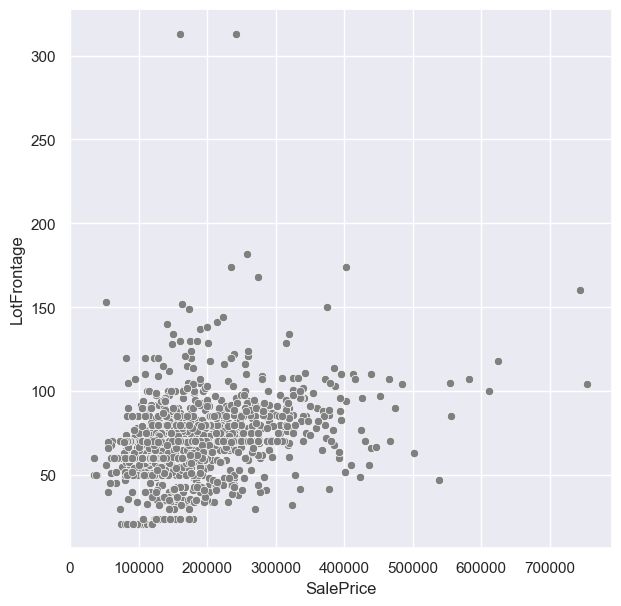

In [53]:
sns.set(rc = {'figure.figsize':(7,7)})
sns.scatterplot(x = 'SalePrice', y = 'LotFrontage', data = df, color = 'gray')

<Axes: xlabel='Street', ylabel='count'>

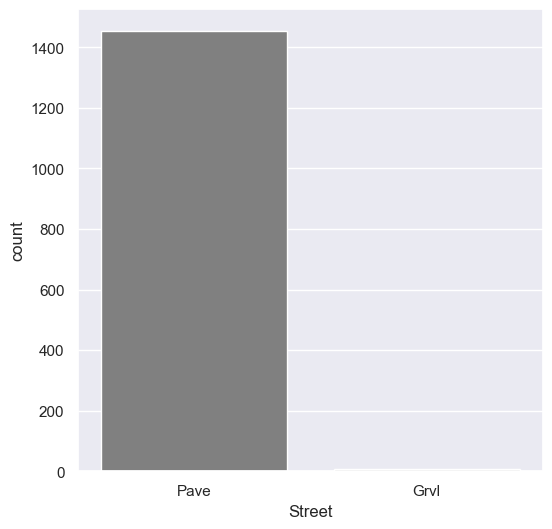

In [54]:
sns.set(rc = {'figure.figsize':(6,6)})
sns.countplot(x = 'Street', data = df, color = 'gray')

[Text(0.5, 0, 'Regular, slightly irregular, Moderately Irregular, Irregular')]

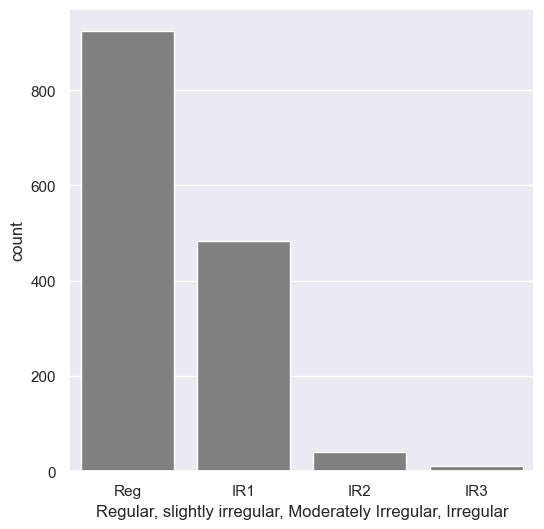

In [55]:
sns.set(rc = {'figure.figsize':(6, 6)})
ax = sns.countplot(x = 'LotShape', data = df, color = 'gray')
ax.set(xlabel = 'Regular, slightly irregular, Moderately Irregular, Irregular')

<Axes: xlabel='LandContour', ylabel='count'>

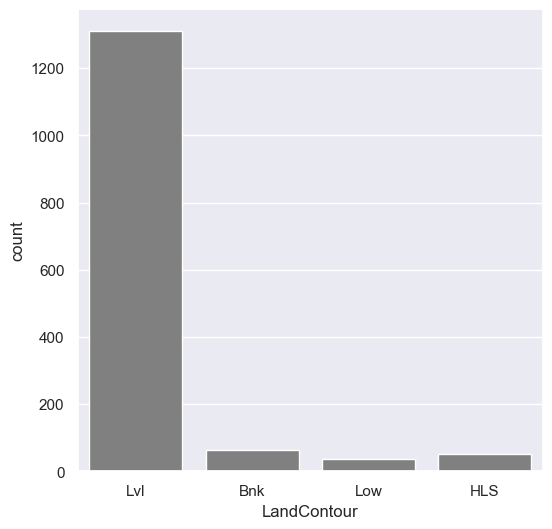

In [56]:
sns.set(rc = {'figure.figsize':(6,6)})
sns.countplot(x = 'LandContour', data = df, color = 'gray')

<Axes: xlabel='LotConfig', ylabel='count'>

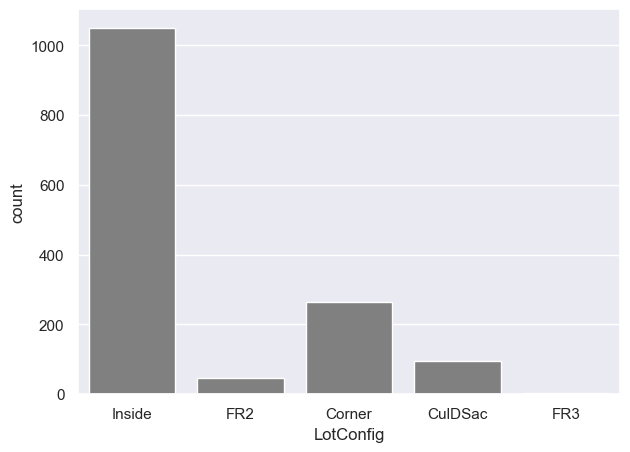

In [57]:
sns.set(rc = {'figure.figsize':(7,5)})
sns.countplot(x = 'LotConfig', data = df, color = 'gray')

<Axes: xlabel='LandSlope', ylabel='count'>

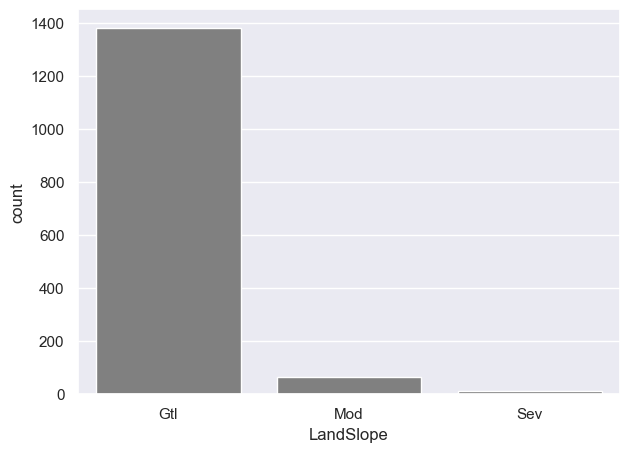

In [58]:
sns.countplot(x = 'LandSlope', data = df, color = 'gray')

<Axes: xlabel='Neighborhood', ylabel='count'>

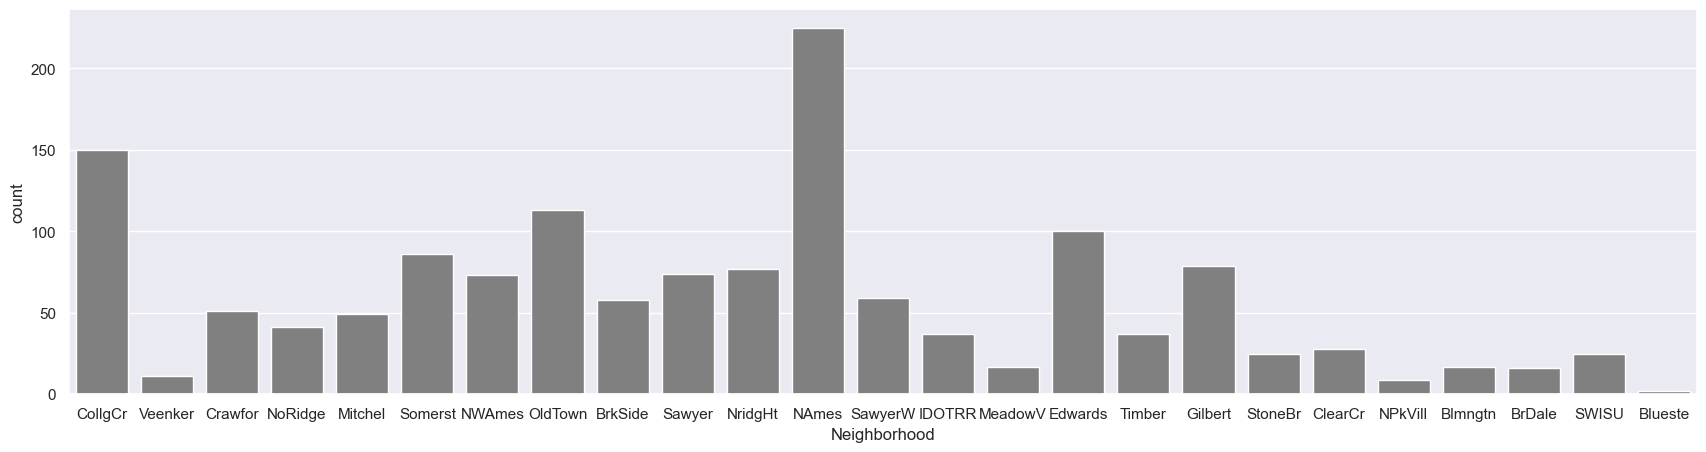

In [59]:
sns.set(rc = {'figure.figsize':(21,5)})
sns.countplot(x = 'Neighborhood', data = df, color = 'gray')

<Axes: xlabel='Condition1', ylabel='count'>

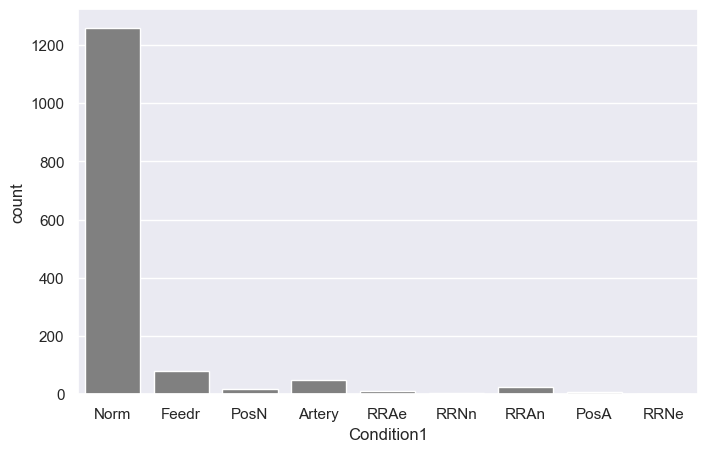

In [60]:
sns.set(rc = {'figure.figsize':(8, 5)})
sns.countplot(x = 'Condition1', data = df, color = 'gray')

<Axes: xlabel='BldgType', ylabel='count'>

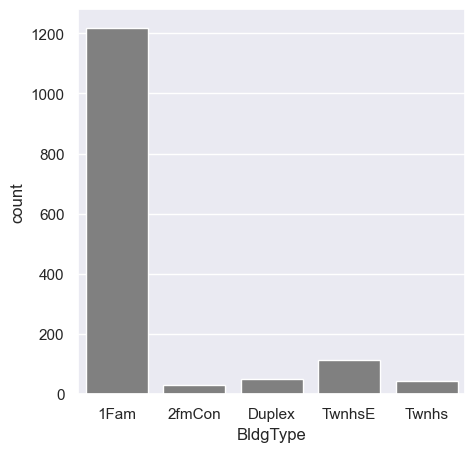

In [61]:
sns.set(rc = {'figure.figsize':(5, 5)})
sns.countplot(x = 'BldgType', data = df, color = 'gray')

<Axes: xlabel='HouseStyle', ylabel='count'>

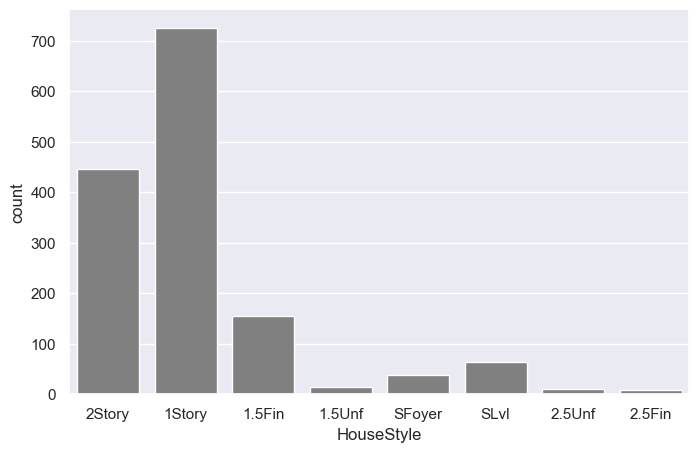

In [62]:
sns.set(rc = {'figure.figsize':(8, 5)})
sns.countplot(x = 'HouseStyle', data = df, color = 'gray')

<Axes: xlabel='OverallQual', ylabel='count'>

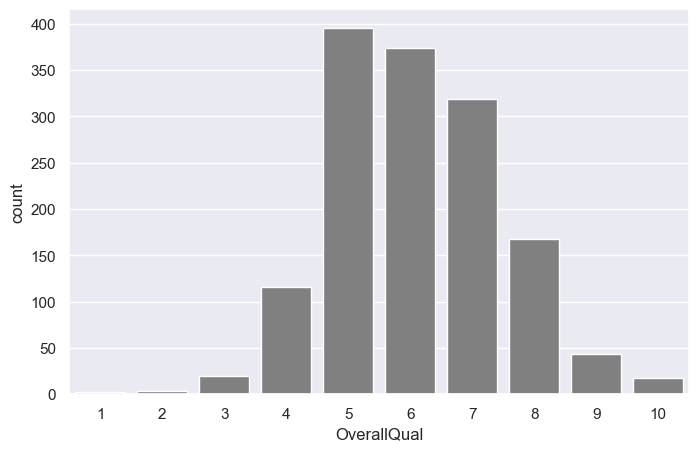

In [63]:
sns.countplot(x = 'OverallQual', data = df, color = 'gray')

<Axes: xlabel='OverallCond', ylabel='count'>

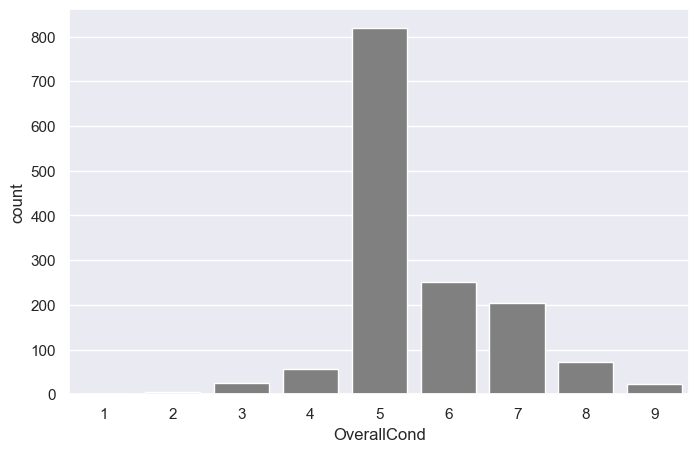

In [64]:
sns.countplot(x = 'OverallCond', data = df, color = 'gray')

<Axes: xlabel='SalePrice', ylabel='YearBuilt'>

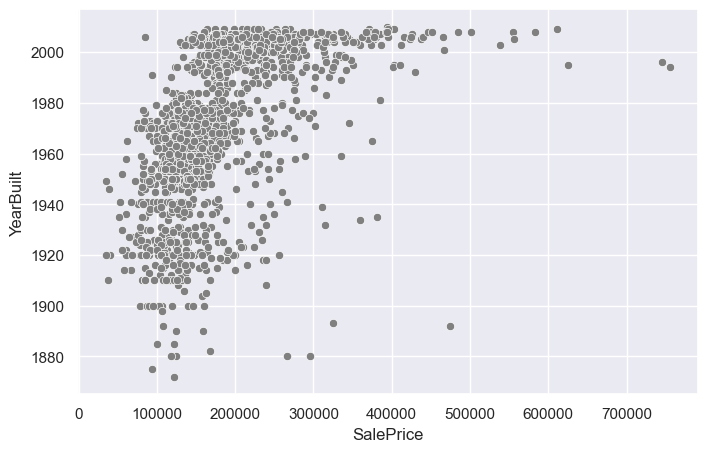

In [65]:
sns.scatterplot(x = 'SalePrice', y = 'YearBuilt', data = df, color = 'gray')

<Axes: xlabel='SalePrice', ylabel='YearRemodAdd'>

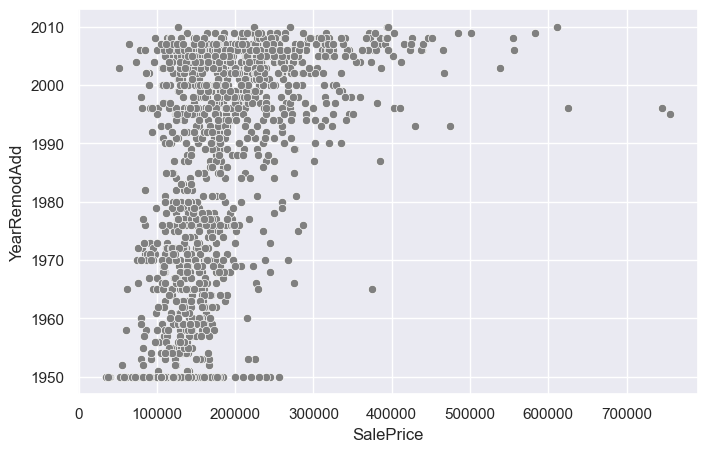

In [66]:
sns.scatterplot(x = 'SalePrice', y = 'YearRemodAdd', data = df, color = 'gray')

<Axes: xlabel='RoofStyle', ylabel='count'>

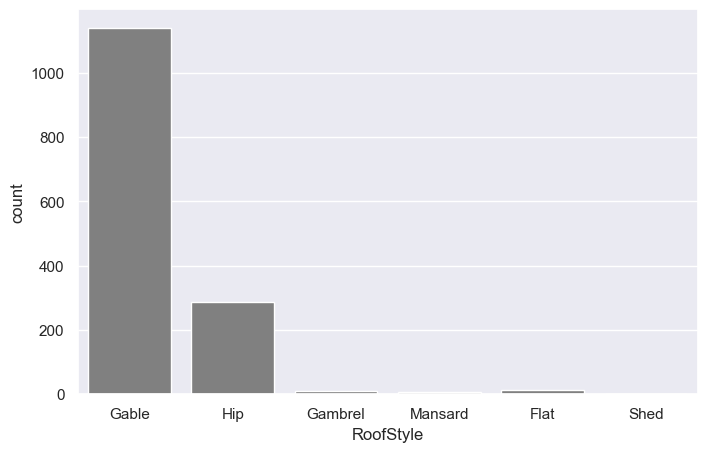

In [67]:
sns.countplot(x = 'RoofStyle', data = df, color = 'gray')

<Axes: xlabel='RoofMatl', ylabel='count'>

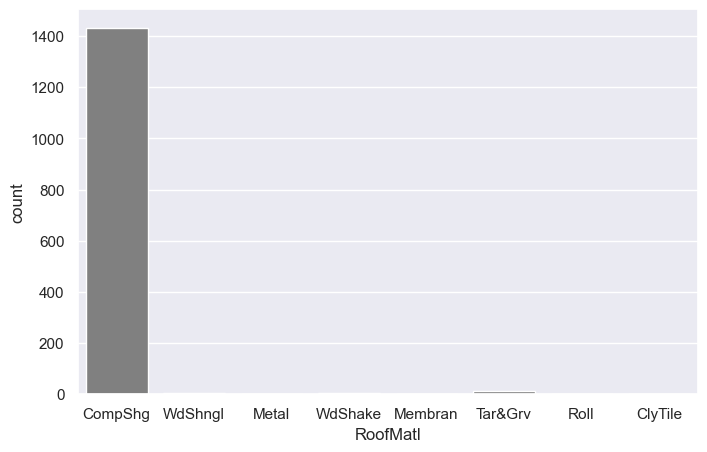

In [68]:
sns.countplot(x = 'RoofMatl', data = df, color = 'gray')

<Axes: xlabel='Exterior1st', ylabel='count'>

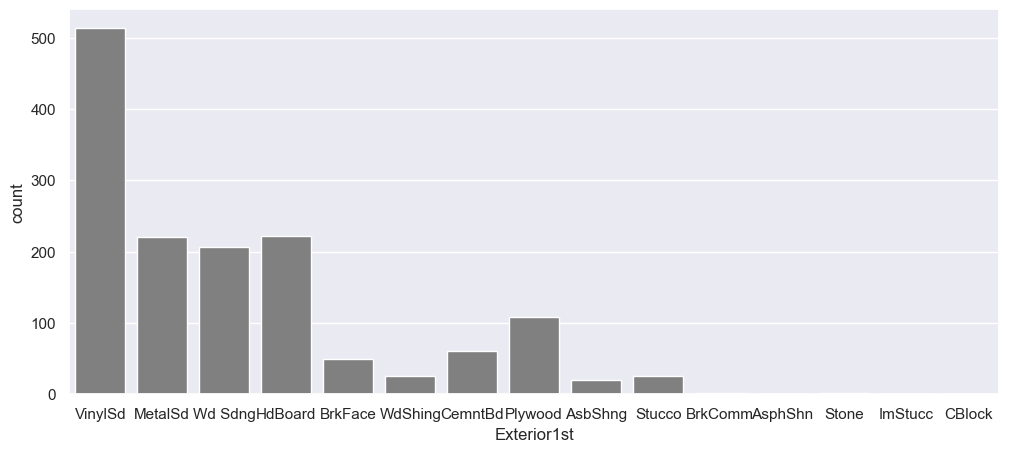

In [69]:
sns.set(rc = {'figure.figsize':(12,5)})
sns.countplot(x = 'Exterior1st', data = df, color = 'gray')

<Axes: xlabel='Exterior2nd', ylabel='count'>

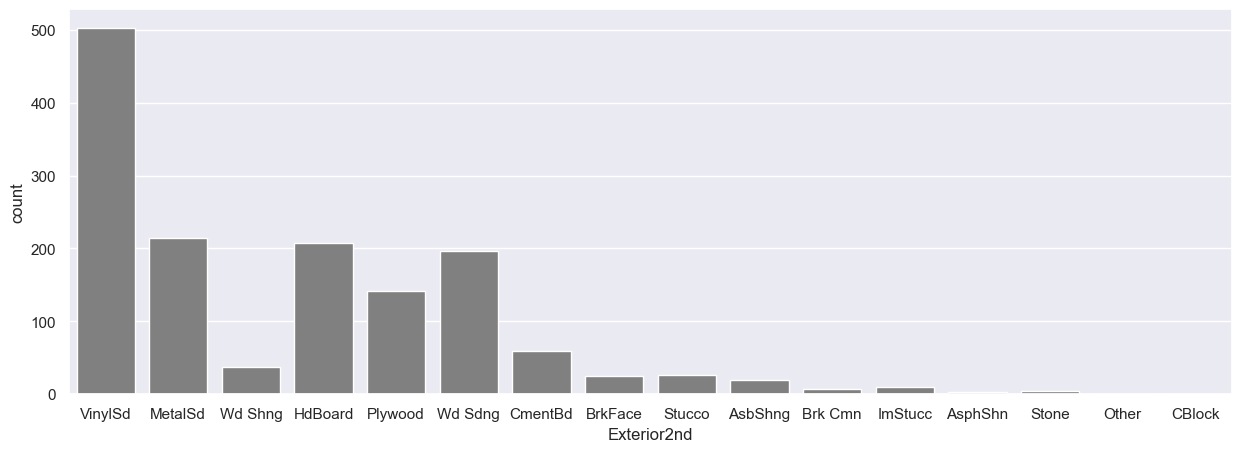

In [70]:
sns.set(rc = {'figure.figsize':(15,5)})
sns.countplot(x = 'Exterior2nd', data = df, color = 'gray')

<Axes: xlabel='MasVnrType', ylabel='count'>

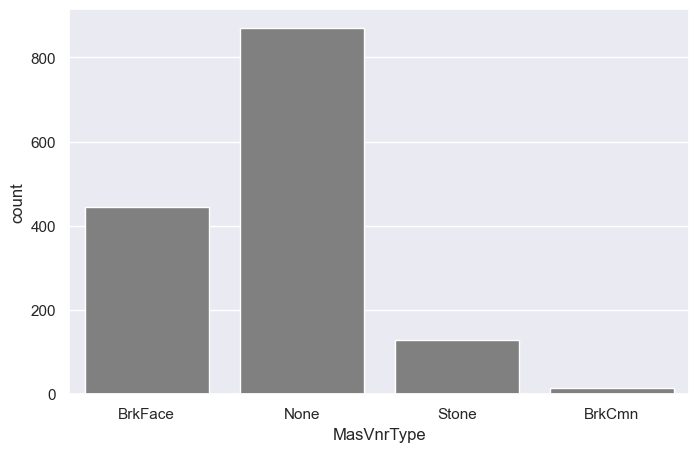

In [71]:
sns.set(rc = {'figure.figsize':(8,5)})
sns.countplot(x = 'MasVnrType', data = df, color = 'gray')

<Axes: xlabel='SalePrice', ylabel='MasVnrArea'>

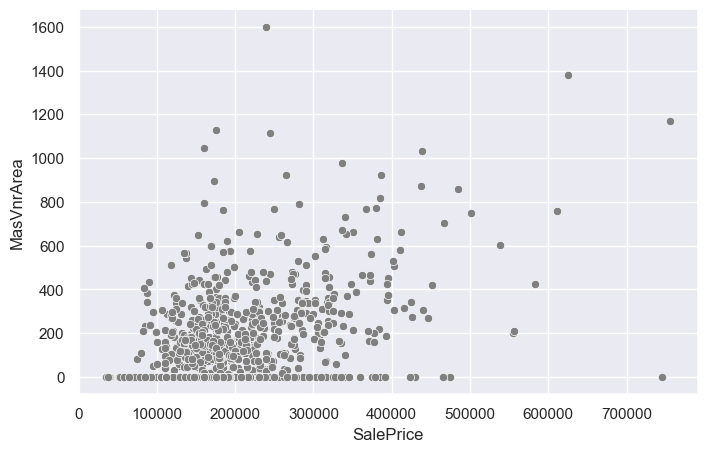

In [72]:
sns.scatterplot(x = 'SalePrice', y = 'MasVnrArea', data = df, color = 'gray')

<Axes: xlabel='ExterQual', ylabel='count'>

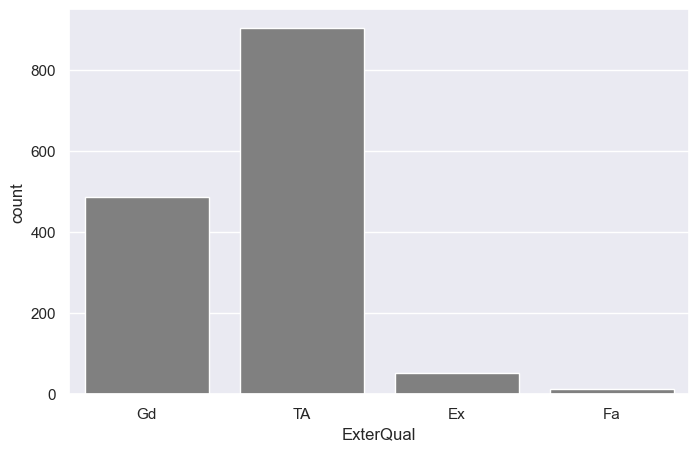

In [73]:
sns.countplot(x = 'ExterQual', data = df, color = 'gray')

<Axes: xlabel='ExterCond', ylabel='count'>

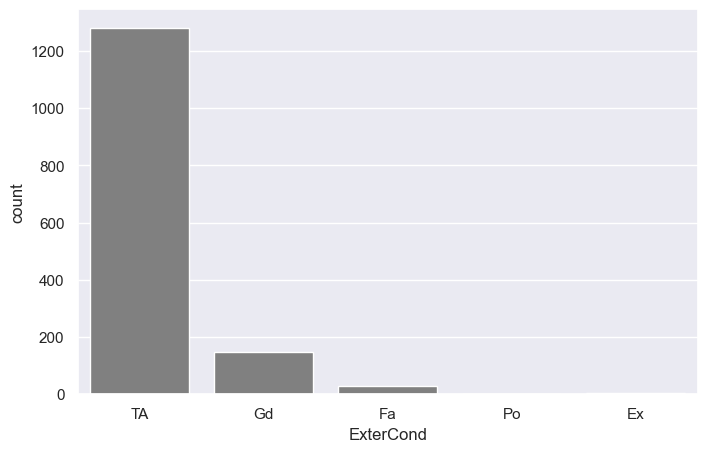

In [74]:
sns.countplot(x = 'ExterCond', data = df, color = 'gray')

<Axes: xlabel='Foundation', ylabel='count'>

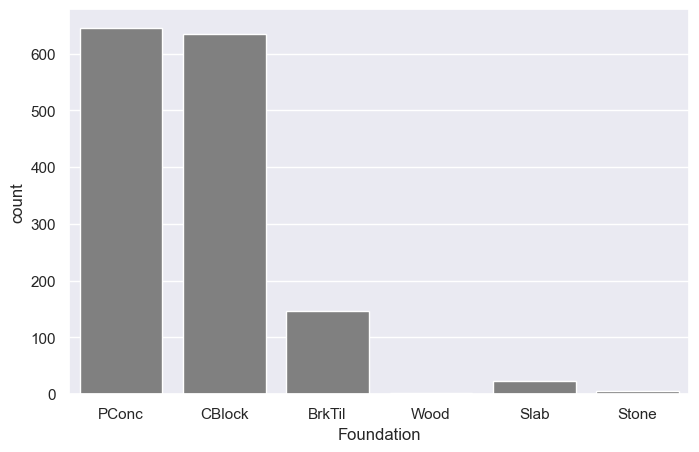

In [75]:
sns.countplot(x = 'Foundation', data = df, color = 'gray')

<Axes: xlabel='BsmtQual', ylabel='count'>

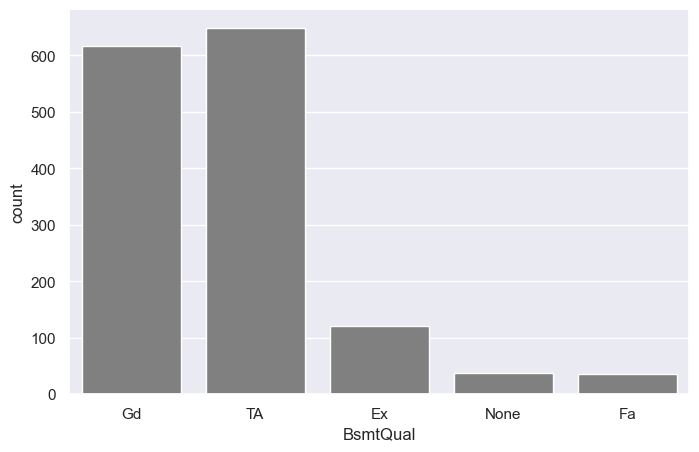

In [76]:
sns.countplot(x = 'BsmtQual', data = df, color = 'gray')

<Axes: xlabel='BsmtCond', ylabel='count'>

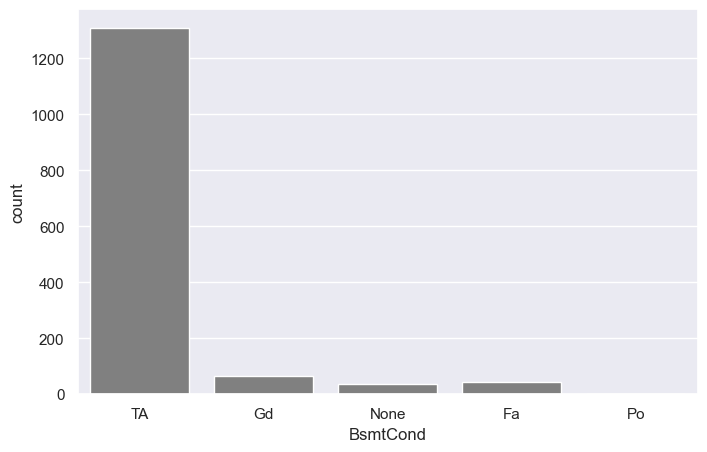

In [79]:
sns.countplot(x = 'BsmtCond', data = df, color = 'gray')

<Axes: xlabel='BsmtExposure', ylabel='count'>

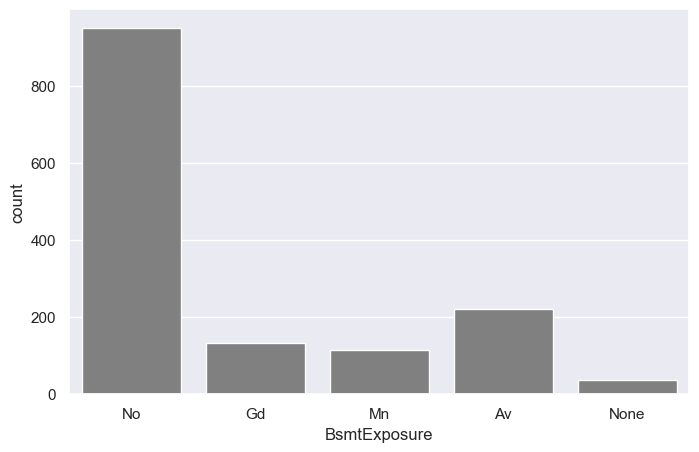

In [81]:
sns.countplot(x = 'BsmtExposure', data = df, color = 'gray')

<Axes: xlabel='BsmtFinType1', ylabel='count'>

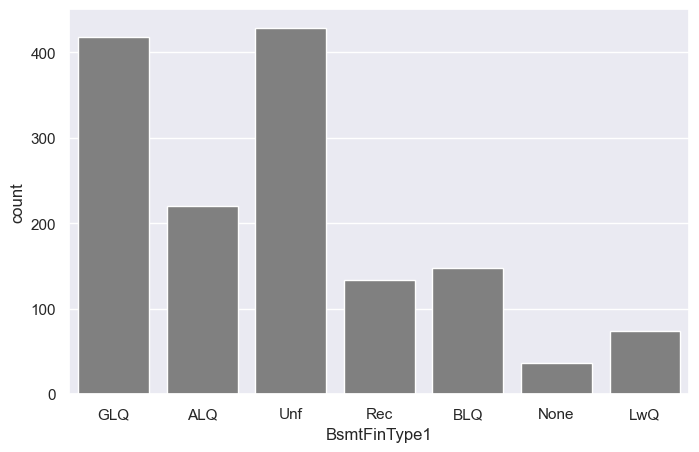

In [82]:
sns.countplot(x = 'BsmtFinType1', data = df, color = 'gray')

<Axes: xlabel='SalePrice', ylabel='BsmtFinSF1'>

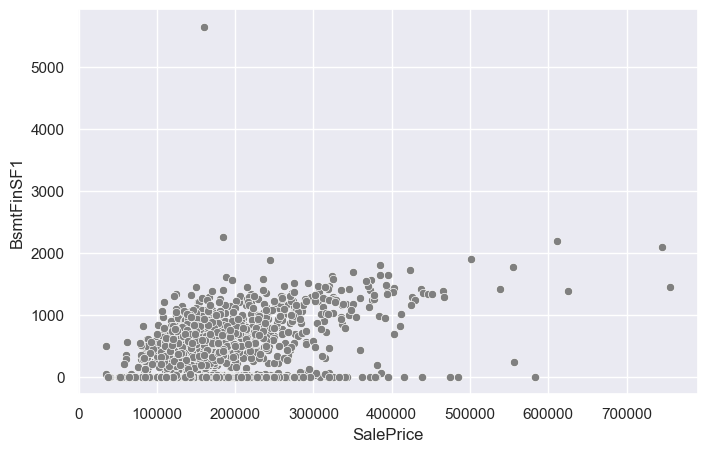

In [83]:
sns.scatterplot(x = 'SalePrice', y = 'BsmtFinSF1', data = df, color = 'gray')

<Axes: xlabel='BsmtFinType2', ylabel='count'>

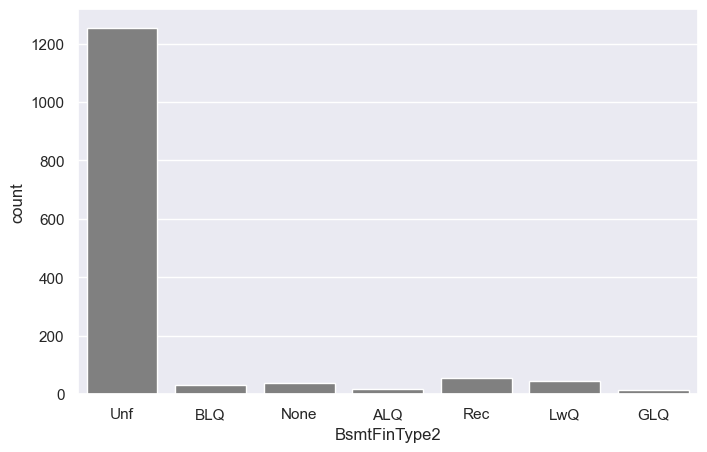

In [84]:
sns.countplot(x = 'BsmtFinType2', data = df, color = 'gray')

<Axes: xlabel='SalePrice', ylabel='BsmtUnfSF'>

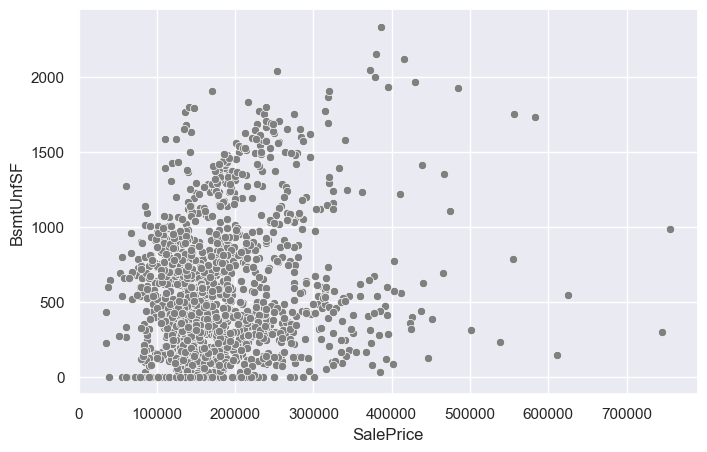

In [86]:
sns.scatterplot(x = 'SalePrice', y = 'BsmtUnfSF', data = df, color = 'gray')

<Axes: xlabel='SalePrice', ylabel='TotalBsmtSF'>

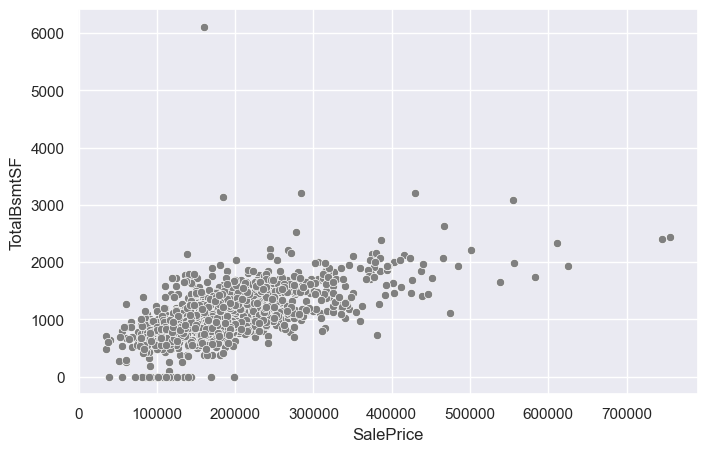

In [87]:
sns.scatterplot(x = 'SalePrice', y = 'TotalBsmtSF', data = df, color = 'gray')

<Axes: xlabel='Heating', ylabel='count'>

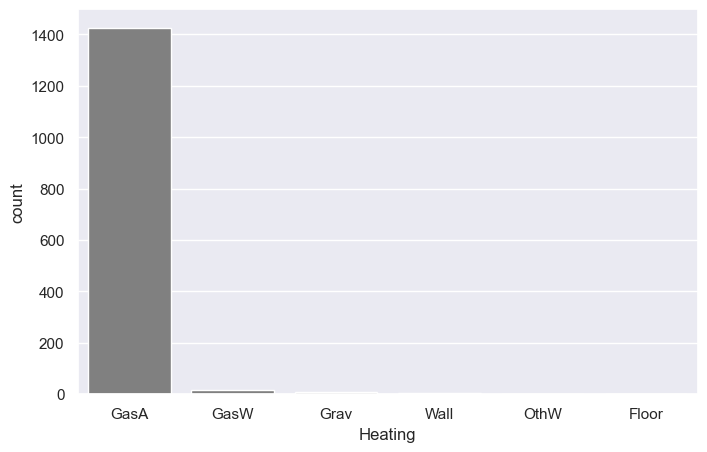

In [89]:
sns.countplot(x = 'Heating', data = df, color = 'gray')

<Axes: xlabel='HeatingQC', ylabel='count'>

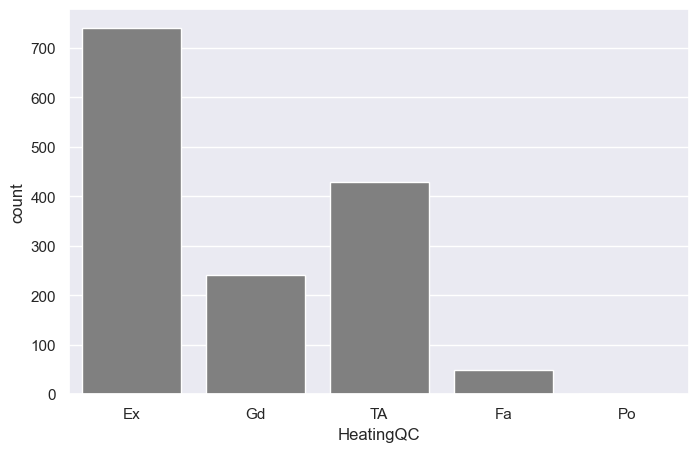

In [90]:
sns.countplot(x = 'HeatingQC', data = df, color = 'gray')

<Axes: xlabel='CentralAir', ylabel='count'>

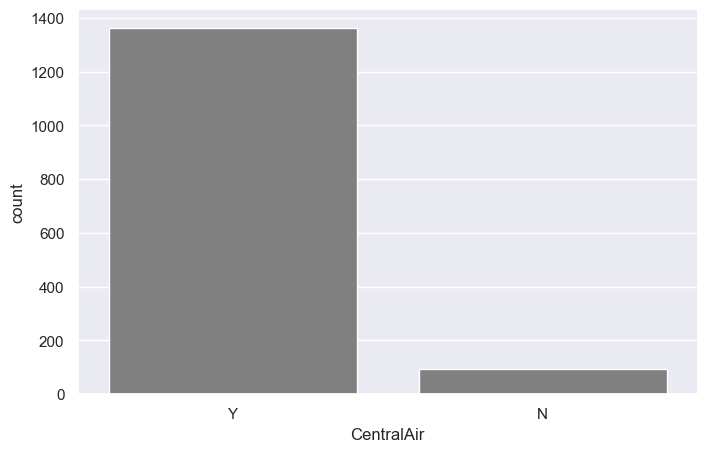

In [91]:
sns.countplot(x = 'CentralAir', data = df, color = 'gray')

<Axes: xlabel='Electrical', ylabel='count'>

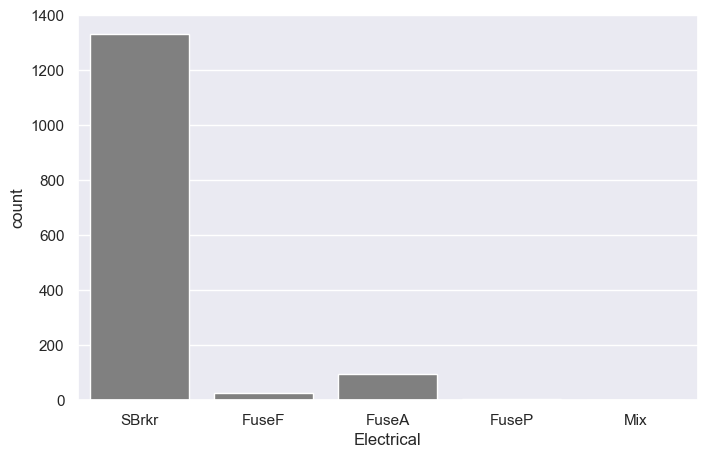

In [93]:
sns.countplot(x = 'Electrical', data = df, color = 'gray')

<Axes: xlabel='SalePrice', ylabel='1stFlrSF'>

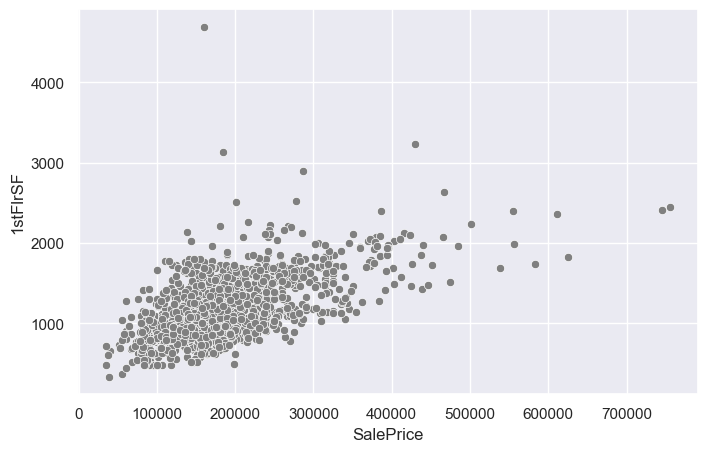

In [95]:
sns.scatterplot(x = 'SalePrice', y = '1stFlrSF', data = df, color = 'gray')

<Axes: xlabel='SalePrice', ylabel='2ndFlrSF'>

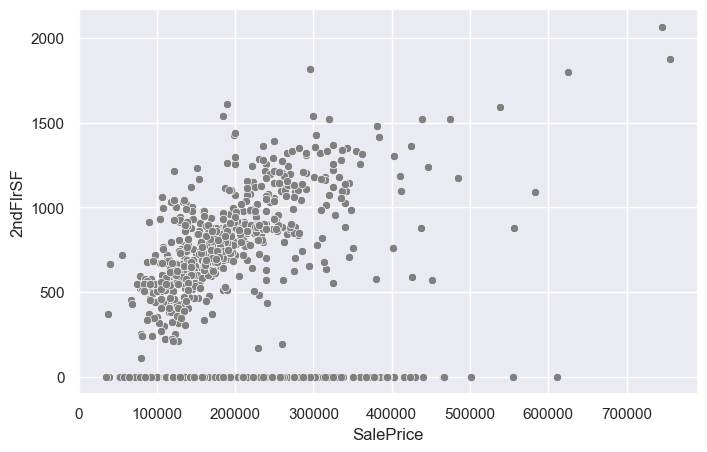

In [101]:
sns.scatterplot(x = 'SalePrice', y = '2ndFlrSF', data = df, color = 'gray')

<Axes: xlabel='SalePrice', ylabel='LowQualFinSF'>

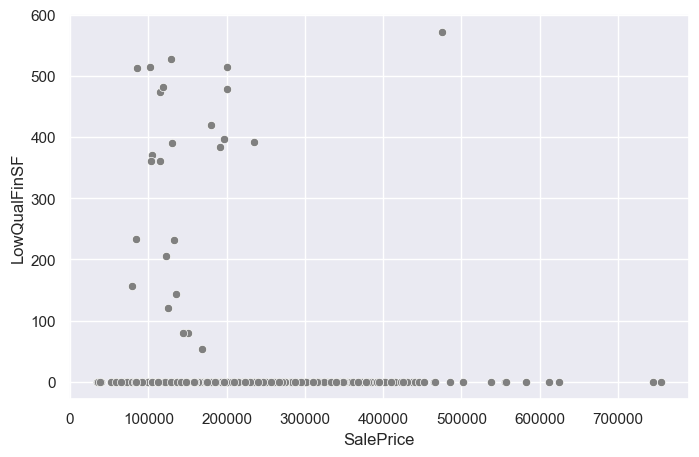

In [102]:
sns.scatterplot(x = 'SalePrice', y = 'LowQualFinSF', data = df, color = 'gray')

<Axes: xlabel='SalePrice', ylabel='GrLivArea'>

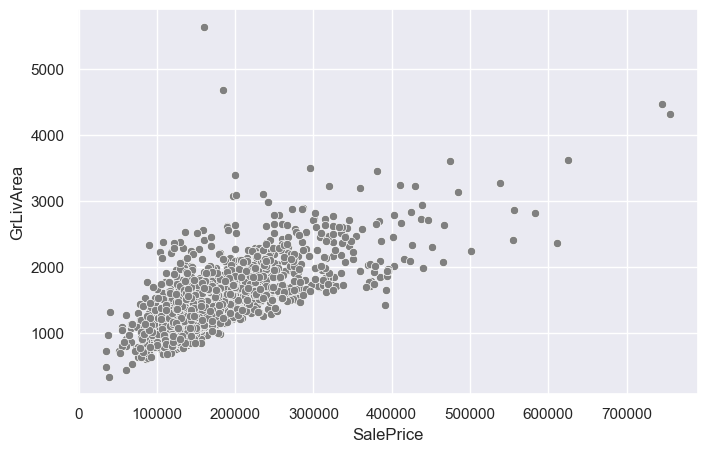

In [104]:
sns.scatterplot(x = 'SalePrice', y = 'GrLivArea', data = df, color = 'gray')

<Axes: xlabel='BsmtFullBath', ylabel='count'>

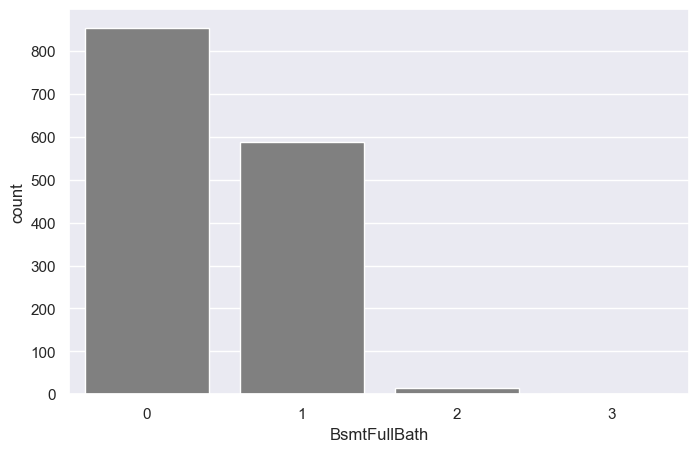

In [105]:
sns.countplot(x = 'BsmtFullBath', data = df, color = 'gray')

<Axes: xlabel='BsmtHalfBath', ylabel='count'>

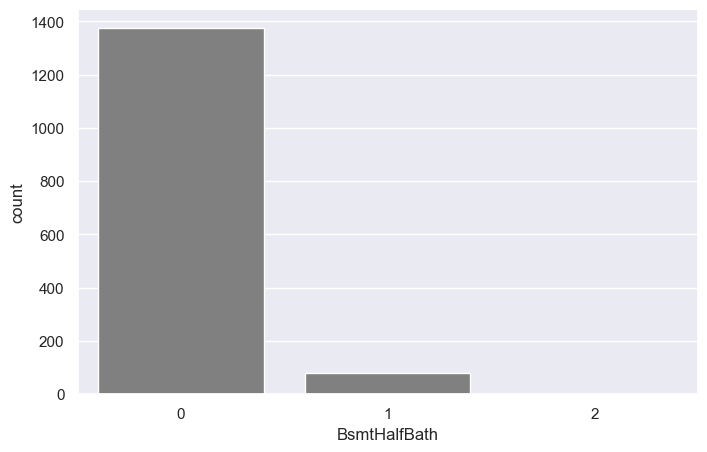

In [107]:
sns.countplot(x = 'BsmtHalfBath', data = df, color = 'gray')

<Axes: xlabel='FullBath', ylabel='count'>

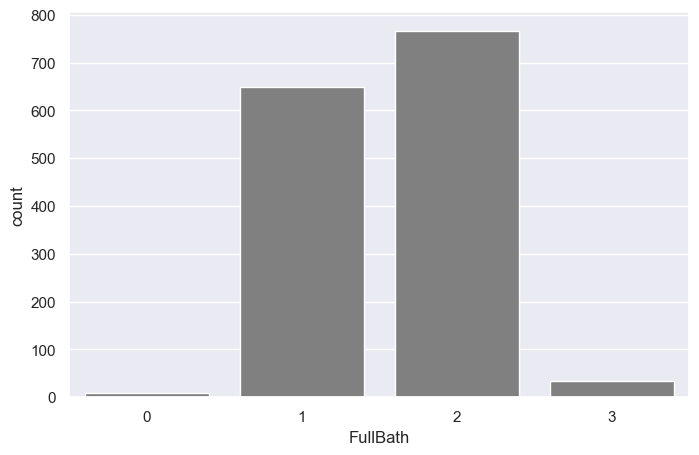

In [190]:
sns.countplot(x = 'FullBath', data = df, color = 'gray')

<Axes: xlabel='HalfBath', ylabel='count'>

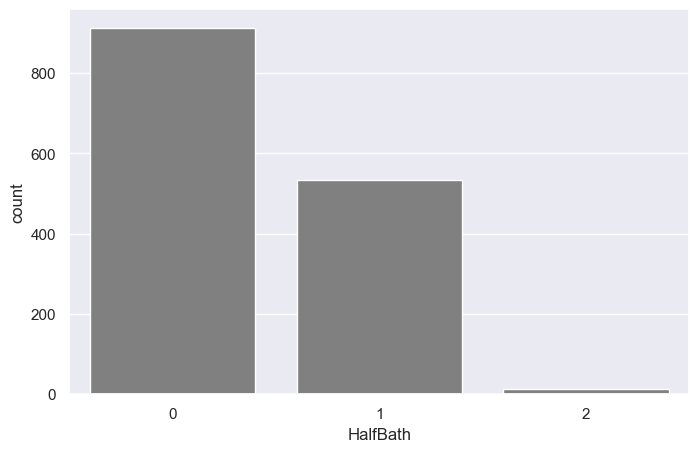

In [192]:
sns.countplot(x = 'HalfBath', data = df, color = 'gray')

<Axes: xlabel='KitchenQual', ylabel='count'>

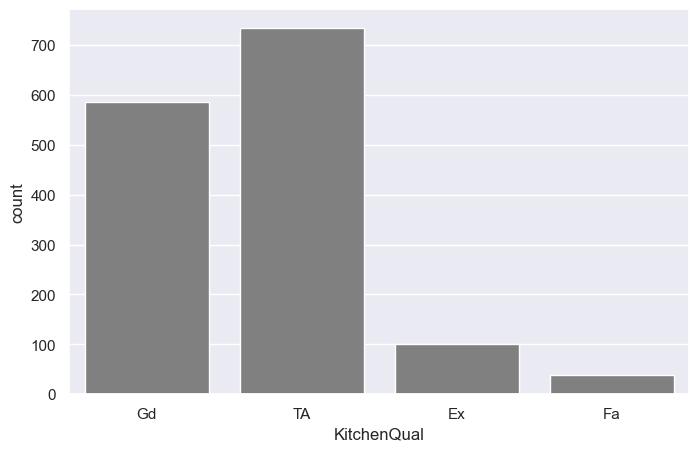

In [194]:
sns.countplot(x = 'KitchenQual', data = df, color = 'gray')

<Axes: xlabel='TotRmsAbvGrd', ylabel='count'>

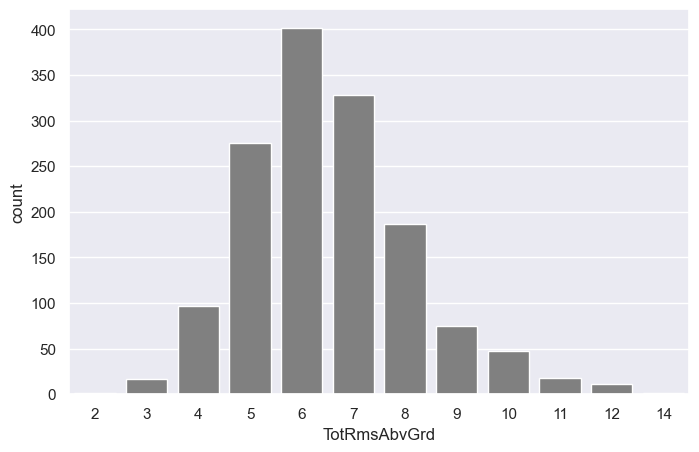

In [196]:
sns.countplot(x = 'TotRmsAbvGrd', data = df, color = 'gray')

<Axes: xlabel='Functional', ylabel='count'>

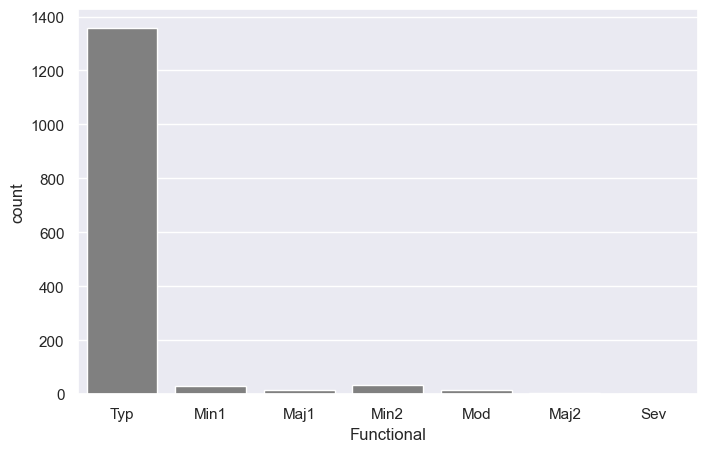

In [198]:
sns.countplot(x = 'Functional', data = df, color = 'gray')

<Axes: xlabel='Fireplaces', ylabel='count'>

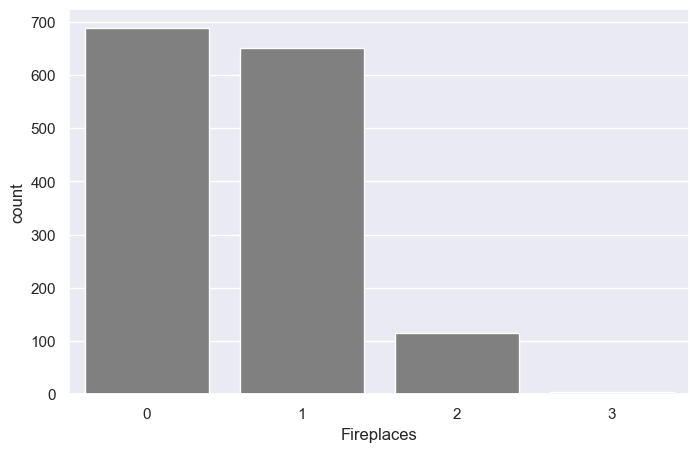

In [200]:
sns.countplot(x = 'Fireplaces', data = df, color = 'gray')

<Axes: xlabel='GarageType', ylabel='count'>

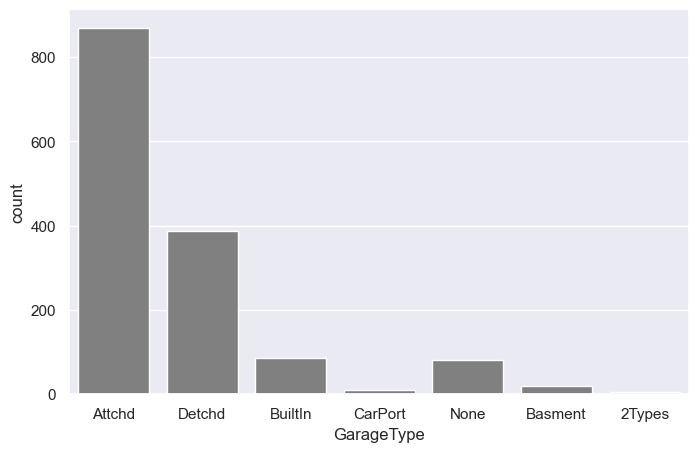

In [202]:
sns.countplot(x = 'GarageType', data = df, color = 'gray')

<Axes: xlabel='SalePrice', ylabel='GarageYrBlt'>

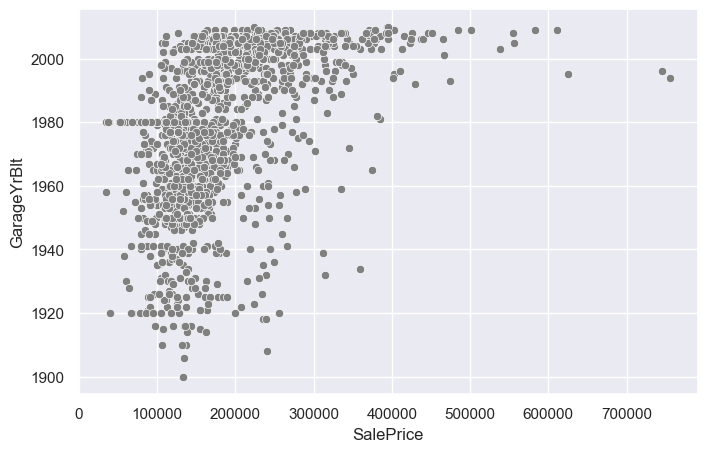

In [204]:
sns.scatterplot(x = 'SalePrice', y = 'GarageYrBlt', data = df, color = 'gray')

<Axes: xlabel='GarageFinish', ylabel='count'>

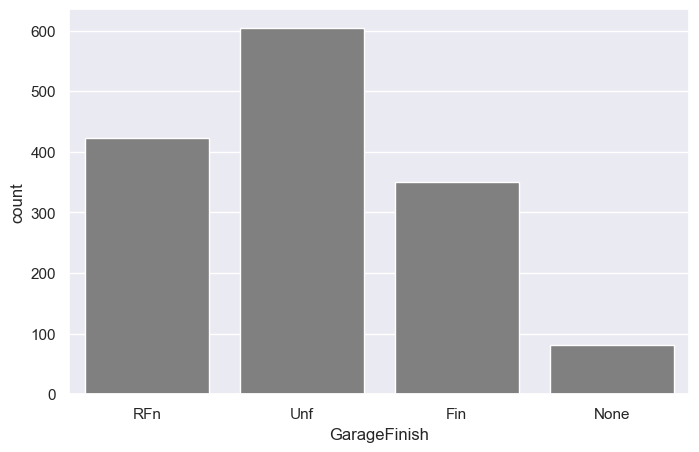

In [206]:
sns.countplot(x = 'GarageFinish', data = df, color = 'gray')

<Axes: xlabel='GarageCars', ylabel='count'>

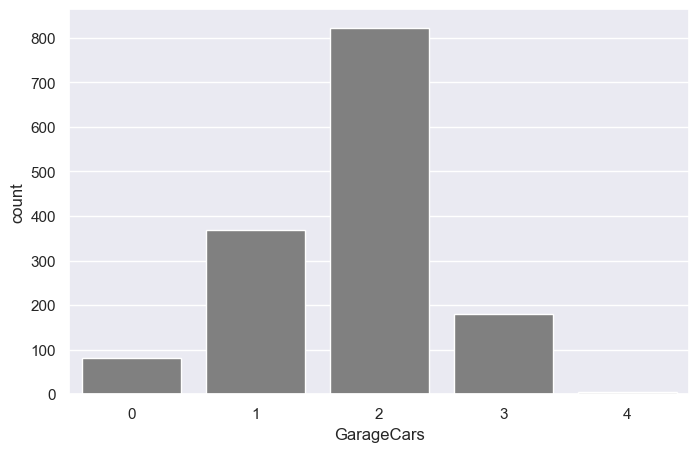

In [208]:
sns.countplot(x = 'GarageCars', data = df, color = 'gray')

<Axes: xlabel='SalePrice', ylabel='GarageArea'>

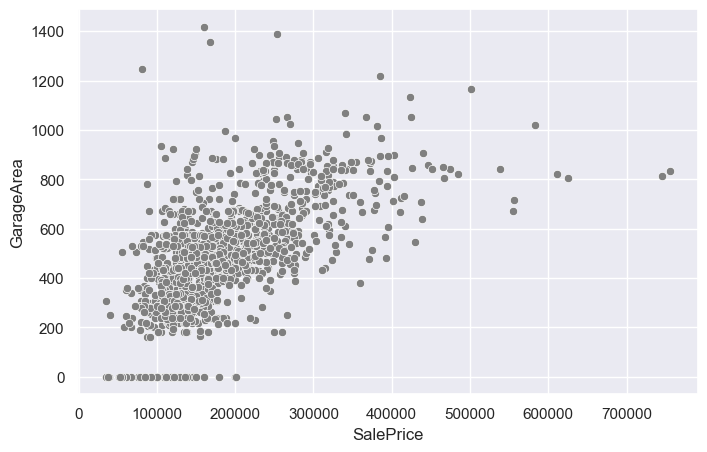

In [210]:
sns.scatterplot(x = 'SalePrice', y = 'GarageArea', data = df, color = 'gray')

<Axes: xlabel='GarageQual', ylabel='count'>

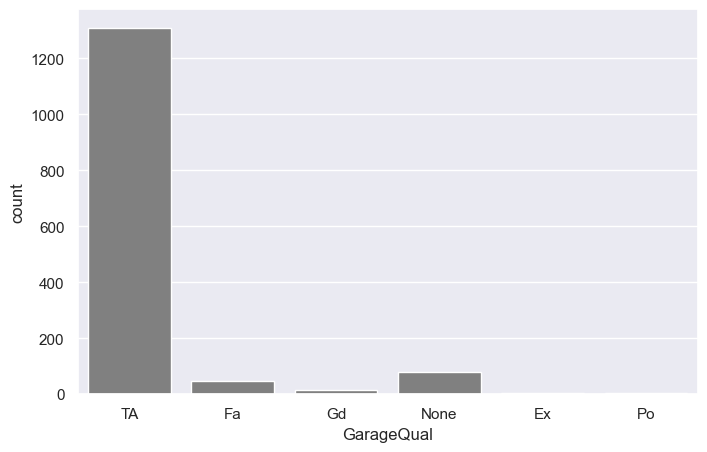

In [212]:
sns.countplot(x = 'GarageQual', data = df, color = 'gray')

<Axes: xlabel='GarageCond', ylabel='count'>

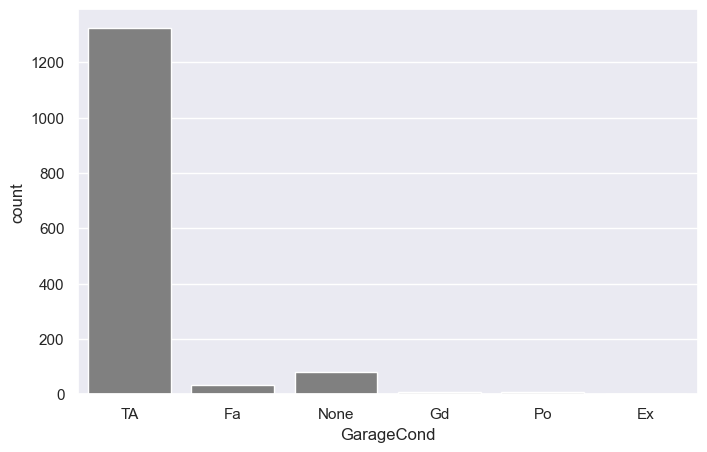

In [216]:
sns.countplot(x = 'GarageCond', data = df, color = 'gray')

<Axes: xlabel='PavedDrive', ylabel='count'>

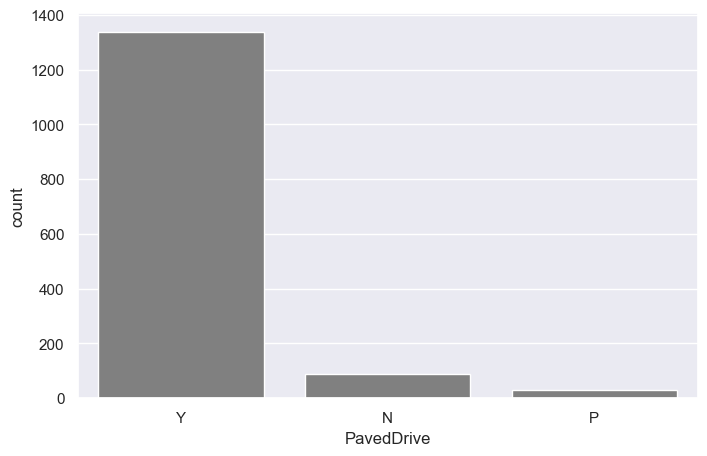

In [218]:
sns.countplot(x = 'PavedDrive', data = df, color = 'gray')

<Axes: xlabel='SalePrice', ylabel='WoodDeckSF'>

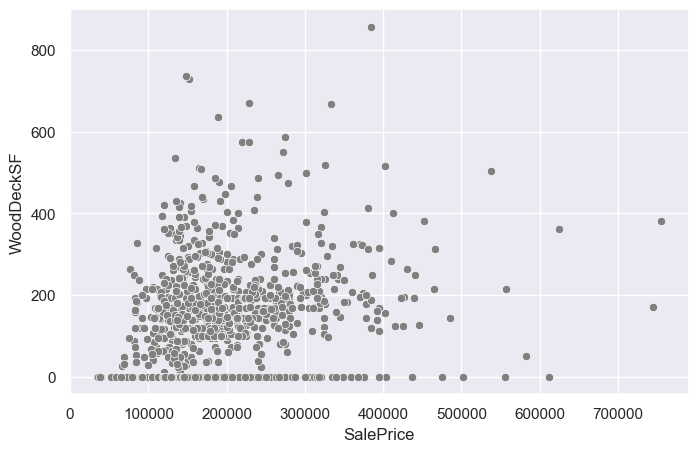

In [220]:
sns.scatterplot(x = 'SalePrice', y = 'WoodDeckSF', data = df, color = 'gray')

<Axes: xlabel='SalePrice', ylabel='OpenPorchSF'>

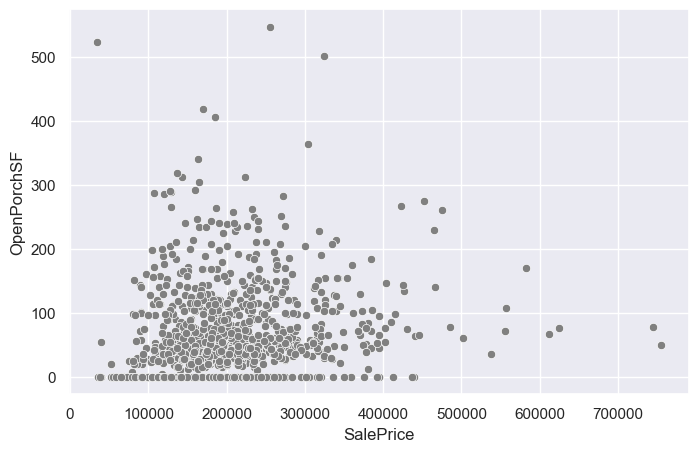

In [222]:
sns.scatterplot(x = 'SalePrice', y = 'OpenPorchSF', data = df, color = 'gray')

<Axes: xlabel='SalePrice', ylabel='EnclosedPorch'>

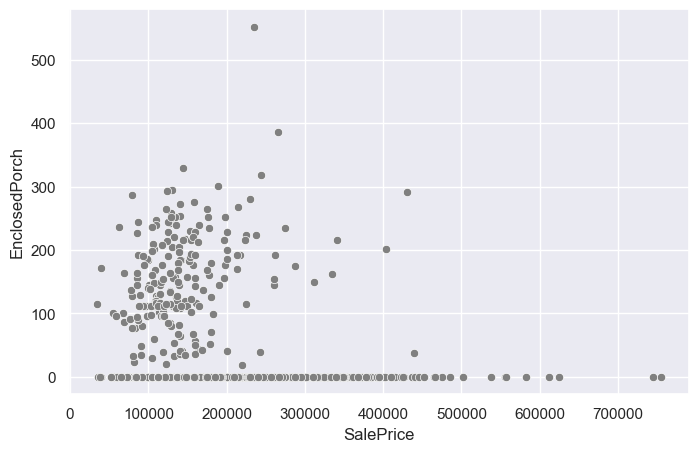

In [224]:
sns.scatterplot(x = 'SalePrice', y = 'EnclosedPorch', data = df, color = 'gray')

<Axes: xlabel='SalePrice', ylabel='3SsnPorch'>

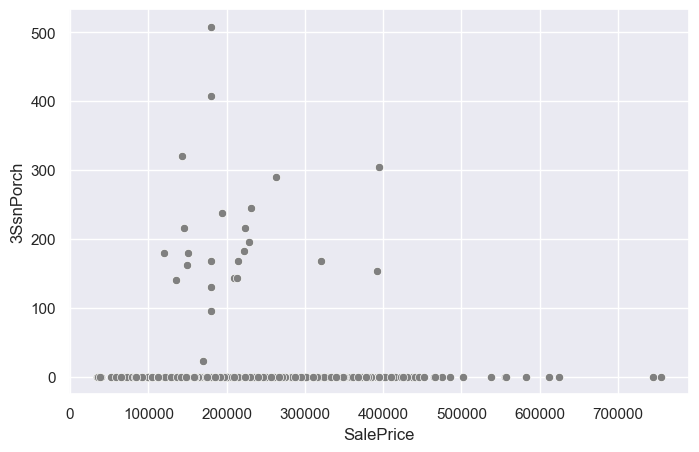

In [228]:
sns.scatterplot(x = 'SalePrice', y = '3SsnPorch', data = df, color = 'gray')

<Axes: xlabel='SalePrice', ylabel='ScreenPorch'>

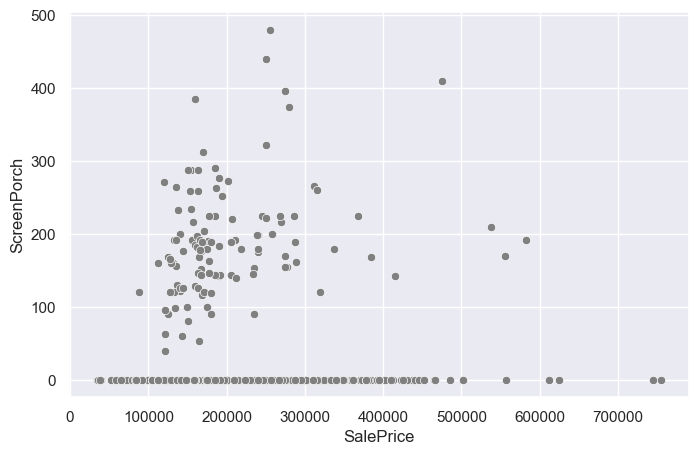

In [230]:
sns.scatterplot(x = 'SalePrice', y = 'ScreenPorch', data = df, color = 'gray')

<Axes: xlabel='SalePrice', ylabel='PoolArea'>

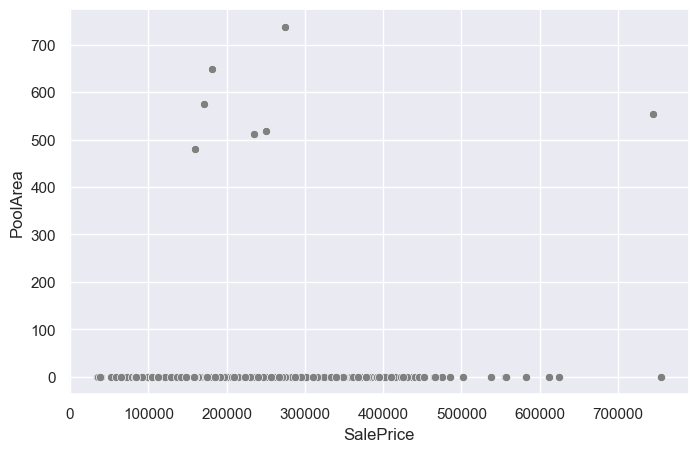

In [232]:
sns.scatterplot(x = 'SalePrice', y = 'PoolArea', data = df, color = 'gray')

<Axes: xlabel='SalePrice', ylabel='MiscVal'>

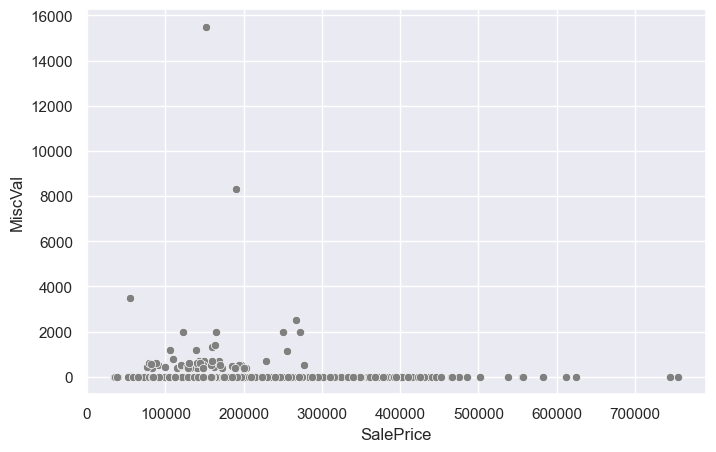

In [234]:
sns.scatterplot(x = 'SalePrice', y = 'MiscVal', data = df, color = 'gray')

<Axes: xlabel='MoSold', ylabel='count'>

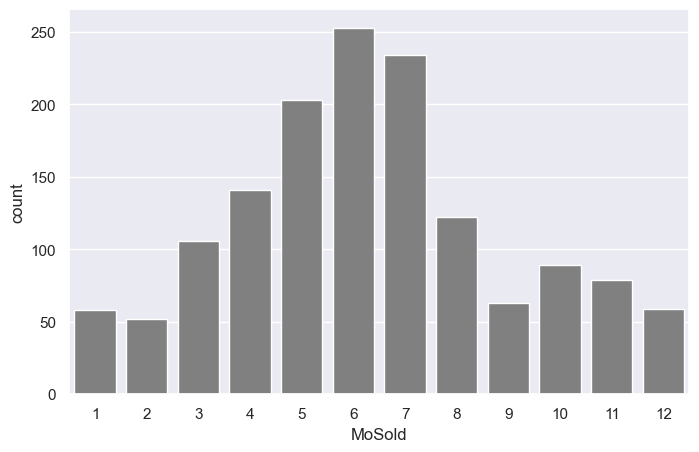

In [236]:
sns.countplot(x = 'MoSold', data = df, color = 'gray')

<Axes: xlabel='YrSold', ylabel='count'>

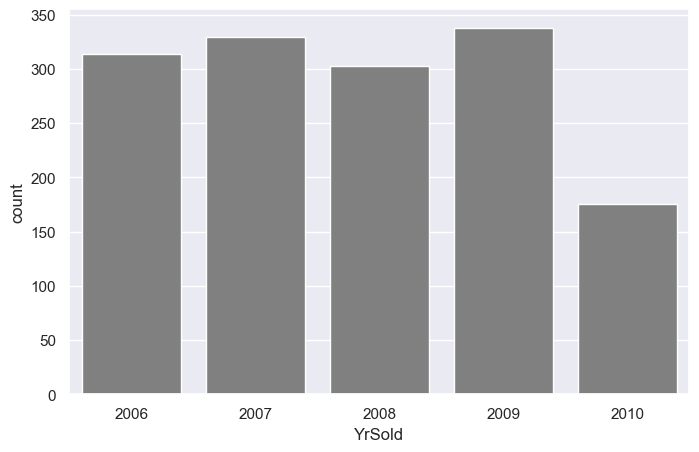

In [238]:
sns.countplot(x = 'YrSold', data = df, color = 'gray')

<Axes: xlabel='SaleType', ylabel='count'>

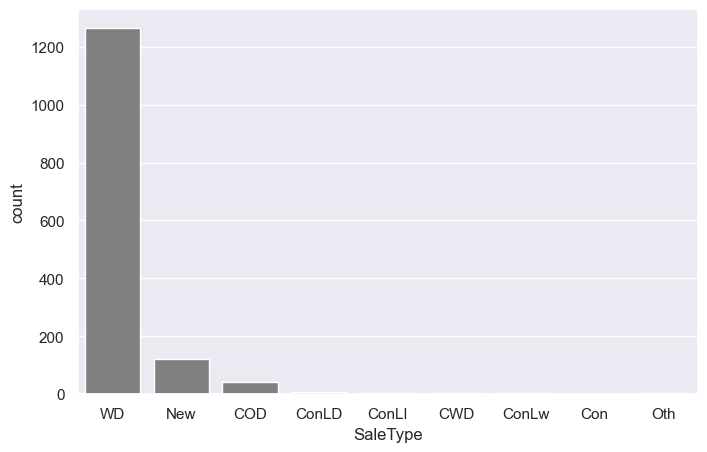

In [240]:
sns.countplot(x = 'SaleType', data = df, color = 'gray')

<Axes: xlabel='SaleCondition', ylabel='count'>

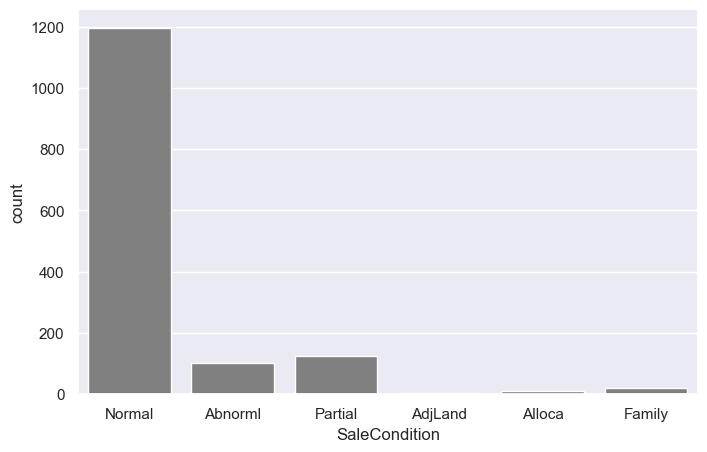

In [242]:
sns.countplot(x = 'SaleCondition', data = df, color = 'gray')

# Feature Engineering

In [247]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckS

In [249]:
df['Remodel'] = df['YearBuilt'] != df['YearRemodAdd']
df['Remodel'] = df['Remodel'].astype(int)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Remodel
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,1
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,1
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,0


In [251]:
df_test['Remodel'] = df_test['YearBuilt'] != df_test['YearRemodAdd']
df_test['Remodel'] = df_test['Remodel'].astype(int)
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Remodel
0,1461,20,RH,80.0,11622,Pave,None,Reg,Lvl,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,None,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,None,MnPrv,None,0,6,2010,WD,Normal,0
1,1462,20,RL,81.0,14267,Pave,None,IR1,Lvl,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,None,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,None,None,Gar2,12500,6,2010,WD,Normal,0
2,1463,60,RL,74.0,13830,Pave,None,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,None,MnPrv,None,0,3,2010,WD,Normal,1
3,1464,60,RL,78.0,9978,Pave,None,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,None,None,None,0,6,2010,WD,Normal,0
4,1465,120,RL,43.0,5005,Pave,None,IR1,HLS,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,None,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,None,None,None,0,1,2010,WD,Normal,0


In [253]:
today = date.today()
def calculate_age(YearBuilt):
    YearBuilt = str(YearBuilt)
    built = datetime.strptime(YearBuilt, '%Y').date()
    return today.year - built.year

In [255]:
df['HouseAge'] = df['YearBuilt'].apply(calculate_age)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Remodel,HouseAge
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,0,21
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,0,48
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,1,23
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,1,109
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,0,24


In [257]:
df_test['HouseAge'] = df_test['YearBuilt'].apply(calculate_age)
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Remodel,HouseAge
0,1461,20,RH,80.0,11622,Pave,None,Reg,Lvl,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,None,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,None,MnPrv,None,0,6,2010,WD,Normal,0,63
1,1462,20,RL,81.0,14267,Pave,None,IR1,Lvl,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,None,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,None,None,Gar2,12500,6,2010,WD,Normal,0,66
2,1463,60,RL,74.0,13830,Pave,None,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,None,MnPrv,None,0,3,2010,WD,Normal,1,27
3,1464,60,RL,78.0,9978,Pave,None,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,None,None,None,0,6,2010,WD,Normal,0,26
4,1465,120,RL,43.0,5005,Pave,None,IR1,HLS,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,None,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,None,None,None,0,1,2010,WD,Normal,0,32


In [259]:
df.drop('YearBuilt', axis = 1, inplace = True)
df.drop('YearRemodAdd', axis = 1, inplace = True)

df_test.drop('YearBuilt', axis = 1, inplace = True)
df_test.drop('YearRemodAdd', axis = 1, inplace = True)

In [261]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Remodel,HouseAge
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,0,21
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,0,48
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,1,23
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,1,109
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,0,24


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  RoofStyle    

# Model Training

In [268]:
x_train = df[[col for col in df.columns if col not in ['SalePrice', 'Id']]]
y_train = df['SalePrice']

In [270]:
x_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Remodel,HouseAge
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,0,21
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,0,48
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,1,23
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,1,109
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,0,24


In [272]:
y_train.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [274]:
x_train = pd.get_dummies(x_train)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Columns: 300 entries, MSSubClass to SaleCondition_Partial
dtypes: bool(264), float64(3), int32(1), int64(32)
memory usage: 792.2 KB


In [276]:
#Initializing the model
clf = RandomForestClassifier(max_depth = 500, random_state = 0)

In [280]:
# Train the model
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=500, random_state=0)

In [282]:
x_test = df[[col for col in df_test.columns if col not in ['SalePrice', 'Id']]]
x_test = pd.get_dummies(x_test)
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Columns: 300 entries, MSSubClass to SaleCondition_Partial
dtypes: bool(264), float64(3), int32(1), int64(32)
memory usage: 792.2 KB


In [284]:
x_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Remodel,HouseAge,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFini

In [286]:
prices = clf.predict(x_test)

In [288]:
prices

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)

In [292]:
output = pd.DataFrame({'Id': df_test.Id, 'SalePrice': prices})
output.head()

,Id,SalePrice
0,1461,208500
1,1462,181500
2,1463,223500
3,1464,140000
4,1465,250000


In [294]:
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Id         1459 non-null   int64
 1   SalePrice  1459 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB


In [296]:
output.to_csv('Submission_RandomForest.csv', index=False)